# <center> FINAL PROJECT ADVANCED PYTHON

## INSTRUCTOR: VAHID HADAVI
### STUDENTS:
* ALISHA THOMAS
* ASWATHY ANILKUMAR
* JASMIN JOSEPH
* NIRAL SHAH
* SUDHY SUKUMARAN

## 1. Data Scraping

### Importing required libraries

In [1675]:
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt


#NLP LIbs
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
import string
import spacy

spacy_nlp = spacy.load('en_core_web_sm')


### Scraping data from website

### Converting scraped text file to csv file

## 2. Data wrangling

In [1676]:
# Read the dataset
df = pd.read_csv('merged_listings.csv')

In [1677]:
# Display first 5 rows
df.head()

listing_id           price                location  year           make  \
0  CC-1819753         $16,500    cleveland, Tennessee  1998         Toyota   
1  CC-1819754  $129,900 (OBO)  POPLAR BLUFF, Missouri  1955      Chevrolet   
2  CC-1819755         $50,000          Miami, Florida  1981           Fiat   
3  CC-1819756         $33,900        Dekalb, Illinois  1965        Pontiac   
4  CC-1819758         $49,500       ASTORIA, New York  1965  Mercedes-Benz   

    model exterior_color        interior_color transmission  odometer  \
0   Ipsum          WHITE                  gray    Automatic     56050   
1    3600          BLACK                   RED    Automatic    999999   
2   Panda     Verdi Alpi  Missoni Rainbow Fabr       Manual     58048   
3  LeMans           Blue                 Black    Automatic    101000   
4   230SL            NaN                   NaN          NaN         0   

  stock_number                vin  \
0          NaN                NaN   
1          NaN        J255L011400   
2      WGV1213  ZFA141A0005569640   
3       156019      237375P156019   
4        25186                NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  \
0  VIDEO OF THIS IPSUM: https://youtu.be/dloiMfHqxAI1998 TOYOTA IPSUM AERO PACKAGE 4X4 AWD- SAME ENGINE AN INTERCHANGEABLE PARTS AS RAV4 AND TOYOTA CAMRY-IT HAS THE 3S-FE 2.0 LITER 4 CYLINDER NON-INTERFERENCE GASOLINE ENGINE WITH AN AUTOMATIC TRANSMISSION. THIS IPSUM HAS 56,050 ORIGINAL MILES. THE MANY OPTIONS THIS IPSUM HAS IS : 4X4, 2WD-ALL WHEEL DRIVE SELECTION, DUAL SUN ROOF, ROOF RACK RAILS, FACTORY BUBBLE WIND DEFLECTORS, FRONT AND REAR BACK UP SENSORS, REAR SPOILER, 15 INCH ALLOY WHEELS, POWER WINDOWS, POWER LOCKS, POWER MIRRORS, RETRACTIBLE MIRRORS, SRS AIRBAGS, POWER STEERING, A/C AIR CONDITIONING, FRONT AND REAR CLIMATE CONTROL, TILT STEERING WHEEL, BLUETOOTH TRANSMITTER FOR HANDS FREE CALLING AND AUDIO STREAMING, USB CHARGING PORT, 3RD ROW SEATING WHICH SEATS 7 COMFORTABLY, REMOVABLE REAR SEATING AND STOW AWAY SEATING.THE SERVICE IT HAD DONE ON IT IS NEW ENGINE OIL, NEW OIL FILTER, NEW TRANSMISSION FLUID, NEW AIR FILTER,NEW R134A FREON, NEW A/C COMPRESSOR OIL, NEW DIEHARD PLATINUM BATTERY, NEW RADIATOR CAP, NEW COOLANT, NEW HARMONIC BALANCER, NEW SERPENTINE BELTS, NEW BRAKES & NEW TIRES ALL THE WAY AROUND.FULLY SERVICED.THIS IPSUM HAS A CLEAN TENNESSEE TITLE WHICH CAN BE REGISTERED ANYWHERE IN THE U.S.APRICE $ 16,500WE DO DELIVER TO YOUR DOOR AT SMALL FEE, ASK FOR PRICE.FOR MORE INFO CALL OR TXT 423-331-

In [1678]:
# To get the concise summery of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   listing_id           16921 non-null  object
 1   price                16921 non-null  object
 2   location             16921 non-null  object
 3   year                 16921 non-null  int64 
 4   make                 16921 non-null  object
 5   model                16921 non-null  object
 6   exterior_color       14827 non-null  object
 7   interior_color       13214 non-null  object
 8   transmission         13212 non-null  object
 9   odometer             16921 non-null  int64 
 10  stock_number         15764 non-null  object
 11  vin                  15141 non-null  object
 12  description          16050 non-null  object
 13  url                  16921 non-null  object
 14  title_status         1429 non-null   object
 15  exterior_condition   1297 non-null   object
 16  seat

In [1679]:
## Generating descriptive statistics
df.describe()

year      odometer
count   16921.000000  1.692100e+04
mean     1991.578039  4.314168e+04
std      1504.326290  1.704209e+05
min         0.000000  0.000000e+00
25%      1965.000000  0.000000e+00
50%      1973.000000  2.016300e+04
75%      1997.000000  6.654300e+04
max    196812.000000  9.999999e+06

In [1680]:
# Shape of the dataframe
print(df.shape)

(16921, 20)


In [1681]:
# Display the count of duplicate columns
print("Duplicates before:", df.duplicated().sum())

# Remove the duplicated rows
df.drop_duplicates(inplace=True)

# Display the no of rows after duplicate removal
print('Number of rows after removing duplicated',df.shape[0])

Duplicates before: 4
Number of rows after removing duplicated 16917


In [1682]:
# Display the null value counts
print(df.isna().sum())

listing_id                 0
price                      0
location                   0
year                       0
make                       0
model                      0
exterior_color          2091
interior_color          3704
transmission            3709
odometer                   0
stock_number            1157
vin                     1780
description              871
url                        0
title_status           15488
exterior_condition     15620
seat_material          15780
engine_history         15898
engine_condition       15660
restoration_history    16104
dtype: int64


<Axes: >

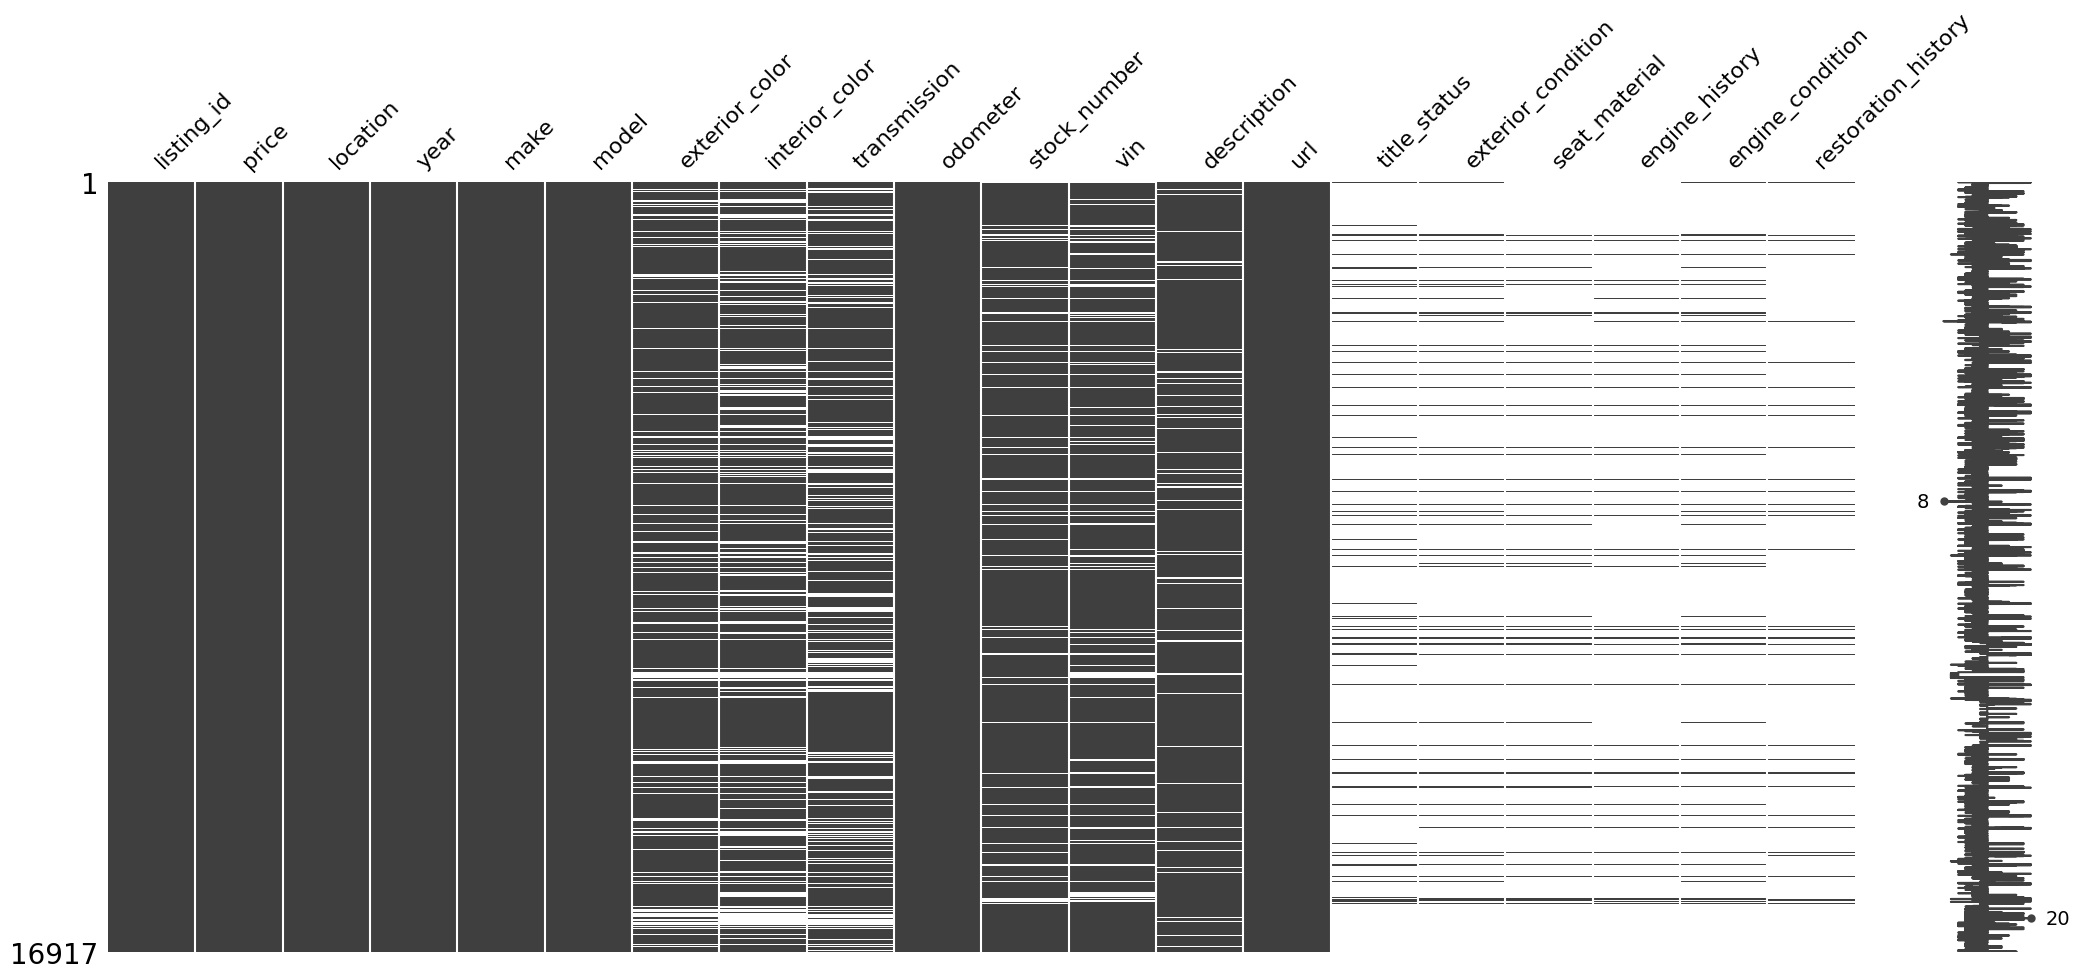

In [1683]:
#visualize the null values
msno.matrix(df)

### Dimensionality reduction

Feature selection: Removing columns having more than 70% missing values

In [1684]:
missing_threshold = 0.7 * len(df)
for column in df.columns:
    if df[column].isnull().sum() > missing_threshold:
        df.drop(column, axis=1, inplace=True)
        print(f"Dropped column {column} due to high missing values.")

Dropped column title_status due to high missing values.
Dropped column exterior_condition due to high missing values.
Dropped column seat_material due to high missing values.
Dropped column engine_history due to high missing values.
Dropped column engine_condition due to high missing values.
Dropped column restoration_history due to high missing values.


Feature selection: Removing the irrelevent variables

In [1685]:
#Removing unnecessary columns such as url,listing_id
df = df.drop(labels=['url','listing_id','vin','stock_number'],axis=1)

In [1686]:
rows = df.shape[0]
for column in df.columns:
    print(f"\nPercentage of missing values in column {column}:  ",round((df[column].isnull().sum()/rows)*100,2))


Percentage of missing values in column price:   0.0

Percentage of missing values in column location:   0.0

Percentage of missing values in column year:   0.0

Percentage of missing values in column make:   0.0

Percentage of missing values in column model:   0.0

Percentage of missing values in column exterior_color:   12.36

Percentage of missing values in column interior_color:   21.9

Percentage of missing values in column transmission:   21.92

Percentage of missing values in column odometer:   0.0

Percentage of missing values in column description:   5.15


In [1687]:
# To check all unique values and their counts

unique_val_check_colomns = ['price','year','make','model','exterior_color','interior_color','transmission','odometer']

for column in unique_val_check_colomns:
    print(column + ': \n', df[column].value_counts(),'\n------------------------------------------------------------------------\n')

price: 
 price
Auction Vehicle           3118
Contact Seller             623
View on AutoHunter.com     173
$19,900                    116
$29,900                    109
                          ... 
$139,800                     1
$7,290                       1
$19,850 (OBO)                1
$1,995                       1
$149,900 (OBO)               1
Name: count, Length: 2386, dtype: int64 
------------------------------------------------------------------------

year: 
 year
1969      741
1967      657
1970      591
1966      557
1965      548
         ... 
1912        1
1943        1
196812      1
1914        1
1911        1
Name: count, Length: 116, dtype: int64 
------------------------------------------------------------------------

make: 
 make
Chevrolet                  4920
Ford                       3168
Dodge                       720
Pontiac                     683
Mercedes-Benz               652
                           ... 
Ralt                          1
Thunder Mou

In [1688]:
# Converting the type of price float type by removing comma and $ sign
df['price'] = df['price'].str.extract(r'(\d+(?:,\d+)*(?:\.\d+)?)', expand=False).str.replace(',', '').astype(float)

In [1689]:
# Get the value counts
value_counts = df['price'].value_counts()

# Sort the value counts by the index (unique values) in ascending order
sorted_value_counts = value_counts.sort_index(ascending=True)
sorted_value_counts

price
1.0          3
395.0        1
950.0        1
1000.0       2
1250.0       2
            ..
725000.0     1
825000.0     1
935000.0     1
1079900.0    2
1459900.0    2
Name: count, Length: 2135, dtype: int64

In [1690]:
# For classic cars value less than 10000 seems unrealistic. Hence we removed that rows
df=df[(df['price']>10000) & (df['price']<500000)]

In [1691]:
#Since odometer has 0 in some rows. It affect the model output. Hence it is removed from the dataset
df=df[df['odometer']>1000]

In [1692]:
df['odometer'].value_counts()

odometer
3800      54
18900     52
20930     51
100000    51
12410     51
          ..
70524      1
40020      1
21877      1
54905      1
63182      1
Name: count, Length: 7475, dtype: int64

In [1693]:
df.isnull().sum()

price                0
location             0
year                 0
make                 0
model                0
exterior_color     789
interior_color    1660
transmission      1191
odometer             0
description        496
dtype: int64

In [1694]:
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" and x.name != 'description' else x)

In [1695]:
make_model = {}

for index, row in df.iterrows():
    make = row['make']
    model = row['model']
    year = row['year']
    transmission = row['transmission']
    
    key = (make, model,year)
    
    if key not in make_model and pd.notnull(transmission):
        make_model[key] = transmission


make_model

{('toyota', 'ipsum', 1998): 'automatic',
 ('chevrolet', '3600', 1955): 'automatic',
 ('fiat', 'panda', 1981): 'manual',
 ('pontiac', 'lemans', 1965): 'automatic',
 ('mercury', '2-dr coupe', 1946): 'manual',
 ('chevrolet', 'impala ss', 1967): 'automatic',
 ('oldsmobile', '442 w-30', 1970): 'automatic',
 ('chevrolet', 'deluxe', 1949): 'manual',
 ('studebaker', 'truck', 1953): 'automatic',
 ('bmw', 'm3', 1997): 'manual',
 ('chevrolet', 'camaro z28', 1991): 'automatic',
 ('mercedes-benz', '380sl', 1984): 'automatic',
 ('ford', 'galaxie 500', 1964): 'manual',
 ('plymouth', 'barracuda', 1970): 'manual',
 ('datsun', '300zx', 1984): 'automatic',
 ('dodge', 'charger', 1968): 'automatic',
 ('chevrolet', 'camaro z28', 1969): 'automatic',
 ('ford', 'f350', 1986): 'manual',
 ('chevrolet', 'nova', 1972): 'automatic',
 ('mg', 'mgb gt', 1973): 'manual',
 ('gmc', 'jimmy', 1987): 'automatic',
 ('chevrolet', 'bel air', 1956): 'automatic',
 ('chevrolet', 'bel air', 1955): 'manual',
 ('lincoln', '4-dr seda

In [1696]:
df['transmission'] = df.apply(lambda row: make_model.get((row['make'], row['model'],row['year']), row['transmission']), axis=1)
print("transmission column null values: ",df['transmission'].isnull().sum())
print("transmission column % null values: ",round((df['transmission'].isnull().sum()/rows)*100,2))

transmission column null values:  454
transmission column % null values:  2.68


In [1697]:
df = df.dropna(subset=['transmission', 'interior_color', 'exterior_color','price'])

In [1698]:
df.rename(columns={'exterior_color':'exteriorColor',"interior_color":"interiorColor"},inplace=True)


In [1699]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7814 entries, 0 to 16920
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          7814 non-null   float64
 1   location       7814 non-null   object 
 2   year           7814 non-null   int64  
 3   make           7814 non-null   object 
 4   model          7814 non-null   object 
 5   exteriorColor  7814 non-null   object 
 6   interiorColor  7814 non-null   object 
 7   transmission   7814 non-null   object 
 8   odometer       7814 non-null   int64  
 9   description    7467 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 671.5+ KB


In [1700]:
df.describe()

price         year      odometer
count    7814.000000  7814.000000  7.814000e+03
mean    44169.745329  1980.460584  5.345828e+04
std     36526.565125    31.454699  6.427603e+04
min     10495.000000     0.000000  1.004000e+03
25%     21950.000000  1966.000000  1.750600e+04
50%     33495.000000  1976.000000  4.645700e+04
75%     53937.500000  1998.000000  7.842625e+04
max    489900.000000  2024.000000  3.542479e+06

## 3.Plotting Techniques

In [1701]:
fig = px.histogram(df, x="transmission",title="Histogram - Transmission")
fig.show()

In [1702]:
fig = px.scatter_matrix(df, dimensions=[col for col in df.columns if col != "description"],width=1800, height=1600)
fig.update_layout(
    title="Pairplot between features",
    title_x=0.5  
)
fig.show()

In [1703]:
fig = px.scatter(df, x='year', y='price',title="Price vs Year")
fig.show()

In [1704]:
fig = px.scatter(df, x='year', y='make',title="Price vs Make")
fig.show()

In [1705]:
fig = px.scatter_3d(df, x='price', y='year', z='make')
fig.show()

<Axes: >

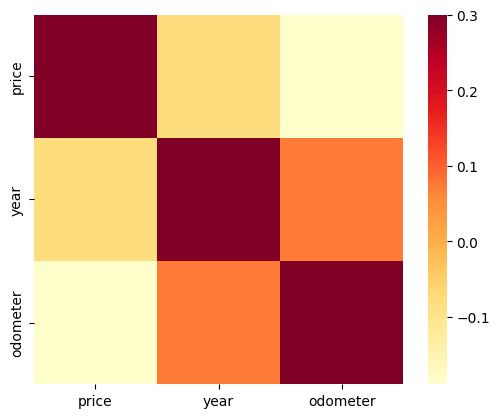

In [1706]:
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

cmap = sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_bad(color='black')

# Heatmap with custom color for missing values
sns.heatmap(df.corr(numeric_only=True),  vmax=.3, square=True, cmap=cmap)

## 4. Pandas Profiling and Making Profiling Report

In [1707]:
from ydata_profiling import ProfileReport

report = ProfileReport(df, title='Pandas Profiling Report')
report.to_file("pandas_profiling_report.html")

Summarize dataset:  71%|███████   | 12/17 [00:02<00:01,  4.22it/s, Calculate auto correlation]    c:\Users\sudhy\.conda\envs\tf-gpu\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'automatic'')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 99.84it/s]


## 5. Feature Engineering

### Feature Extraction

In [1708]:
df['state'] = df['location'].str.split(', ').str[1]
df['city'] = df['location'].str.split(', ').str[0]


In [1709]:
df['city'].value_counts()

city
o'fallon        1471
concord          448
kentwood         340
cadillac         256
addison          197
                ... 
wailuku            1
murfreesboro       1
regina             1
auburn             1
oak bluff          1
Name: count, Length: 663, dtype: int64

Since there are 789 distinct values for city. Hence it does not make much impact on the prediction model. Therefore the feature city is dropped.

In [1710]:
df.drop(columns=['city'],inplace=True)

In [1711]:
df['state'].unique()

array(['tennessee', 'missouri', 'florida', 'illinois', 'colorado',
       'arkansas', 'pennsylvania', 'kentucky', 'alabama', 'indiana',
       'texas', 'michigan', 'virginia', 'georgia', 'arizona', 'minnesota',
       'north carolina', 'new york', 'iowa', 'california', 'washington',
       'new jersey', 'nevada', 'louisiana', 'ohio', 'oregon', 'wisconsin',
       'massachusetts', 'south carolina', 'ontario', 'south dakota',
       'new hampshire', 'nebraska', 'british columbia', 'mississippi',
       'oklahoma', 'connecticut', 'italy', 'noord-brabant', 'quebec',
       'kansas', 'rhode island', 'maryland', 'north dakota',
       'noord-holland', 'idaho', 'noord brabant', 'new mexico', 'vermont',
       'nm', 'maine', 'manitoba', 'west virginia', 'saskatchewan',
       'hawaii', 'wyoming', 'montana', 'utah', 'nh', 'ny', 'sc', 'pa',
       'alberta', 'nc', 'az - arizona', 'north-holland', 'md', 'tx', 'ca',
       'fl', 'budapest', 'south caroline', 'co', 'atlanta'], dtype=object)

In [1712]:
#Replace short form with its original form.
df['state'].replace(['by','nm','fl','nh','mi','sc','pa','nv','nc','az - arizona','md','tx','ca','co','il.','fl.','ny'],
                    ['bavaria','new mexico','florida','north-holland','michigan','south caroline','pennsylvania','nevada','north carolina','arizona',
                    'maryland','texas','california','colorado','illinois','florida','new york'], inplace=True)

C:\Users\sudhy\AppData\Local\Temp\ipykernel_11448\3122214465.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### Categorical encoding

In [1713]:
make_freq = df['make'].value_counts()
df['make_freq'] = df['make'].map(make_freq)
df.head(3)

interiorColor_freq = df['interiorColor'].value_counts()
df['interiorColor_freq'] = df['interiorColor'].map(interiorColor_freq)


exterior_freq = df['exteriorColor'].value_counts()
df['exterior_freq'] = df['exteriorColor'].map(exterior_freq)


model_freq = df['model'].value_counts()
df['model_freq'] = df['model'].map(model_freq)


state_freq = df['state'].value_counts()
df['state_freq'] = df['state'].map(state_freq)



### One hot encoding

In [1714]:
encoded=pd.get_dummies(df['transmission'],prefix='transmission')
df=pd.concat([df,encoded],axis=1)

Since feature transmission_automatic and transmission_manual are carrying same information. hence drop one colunm. Here transmission_manual is dropped.

In [1715]:
df.drop(columns=['transmission_manual'],inplace=True)
df['transmission_automatic'] = df['transmission_automatic'].astype(int)

In [1716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7814 entries, 0 to 16920
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   7814 non-null   float64
 1   location                7814 non-null   object 
 2   year                    7814 non-null   int64  
 3   make                    7814 non-null   object 
 4   model                   7814 non-null   object 
 5   exteriorColor           7814 non-null   object 
 6   interiorColor           7814 non-null   object 
 7   transmission            7814 non-null   object 
 8   odometer                7814 non-null   int64  
 9   description             7467 non-null   object 
 10  state                   7814 non-null   object 
 11  make_freq               7814 non-null   int64  
 12  interiorColor_freq      7814 non-null   int64  
 13  exterior_freq           7814 non-null   int64  
 14  model_freq              7814 non-null   int6

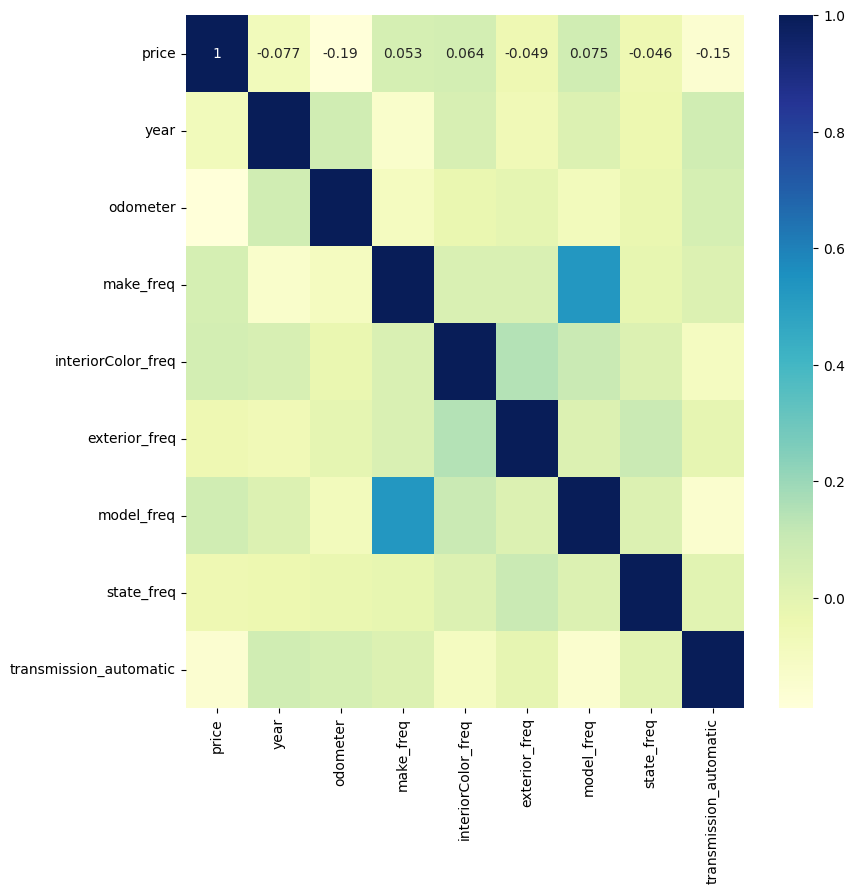

In [1717]:
df_numeric = df.select_dtypes(include='number')
plt.figure(figsize=(9,9))
sns.heatmap(df_numeric.corr(), annot=True, cmap='YlGnBu')
plt.show()


## 6. Identify and correct Outliers
### 6.1 Outlier detection using visualization techniques

### Outlier detection using boxplot

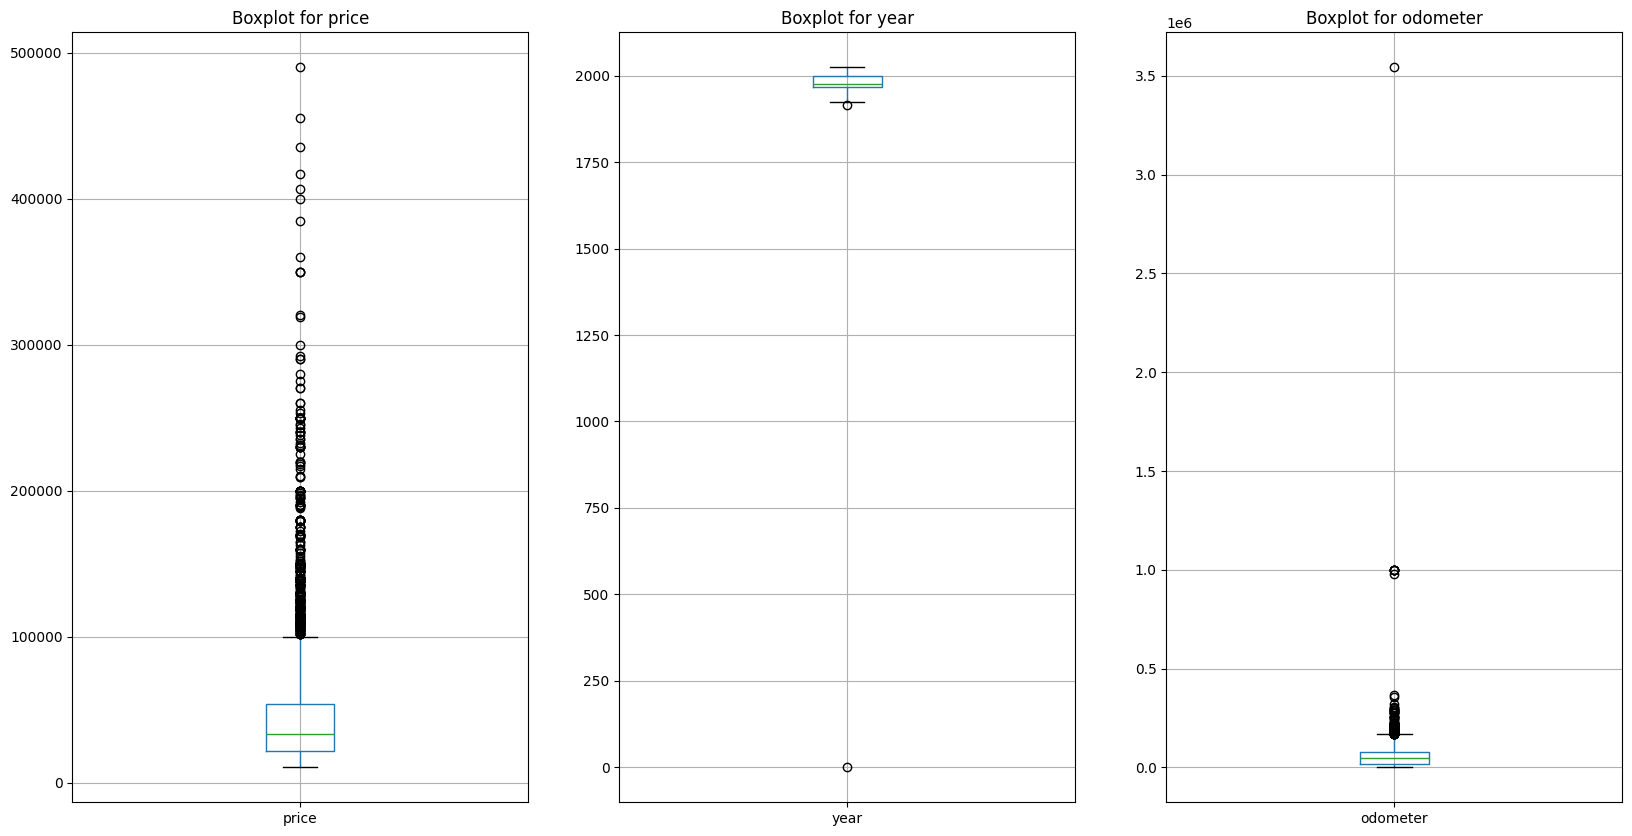

In [1718]:
#drawing boxplot for each column
columns = ['price' , 'year','odometer']
plt.figure(figsize = (20, 10))
for i , col in enumerate( columns ):
    # Plotting various columns to analyse and see outliers
    plt.subplot( 1 , 3 , i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s"%col)
plt.show()

###  Outlier detection using Histogram

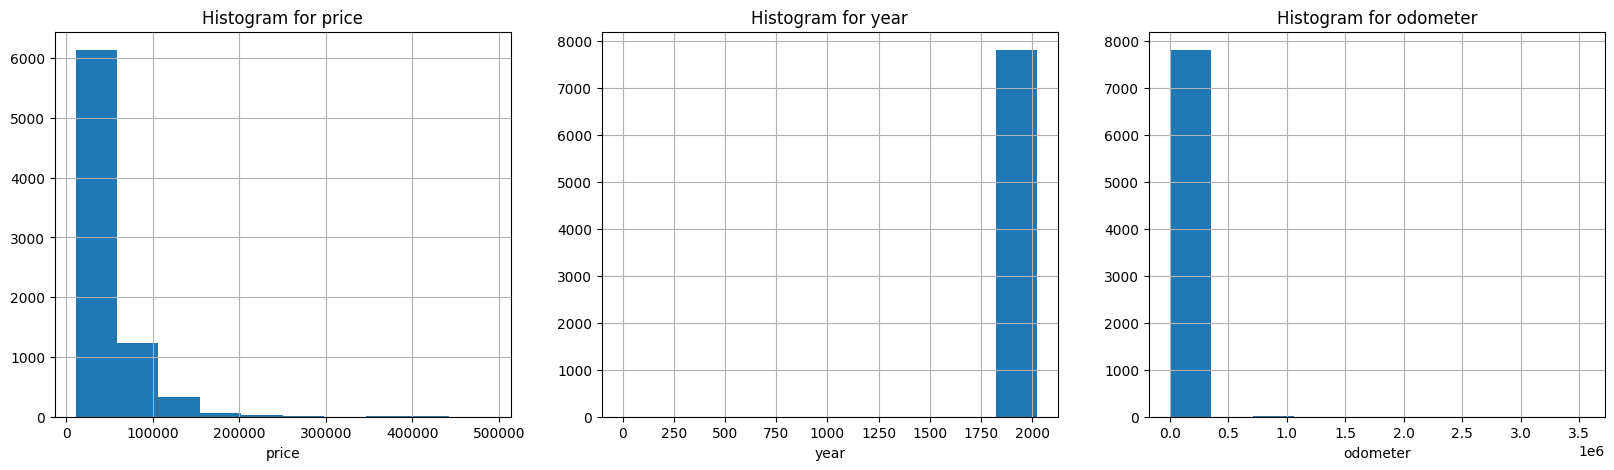

In [1719]:
# Histogram of each column
columns = ['price' , 'year','odometer']
plt.figure(figsize = (20, 5))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 1 , 3 , i + 1 )
    df[col].hist(bins = 10)
    plt.title("Histogram for %s"%col)
    plt.xlabel(col)
plt.show()

## it is clear that price and size_sqft having outliers

###  Outlier detection using Scatter plot

Text(0, 0.5, 'Price')

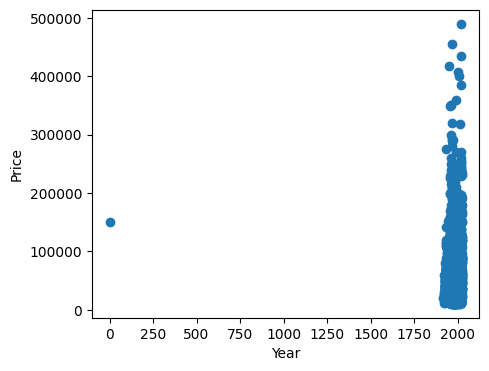

In [1720]:
#using scatterplots 
fig,ax=plt.subplots(figsize=(5,4))
ax.scatter(df['year'],df['price'])
ax.set_xlabel('Year')
ax.set_ylabel('Price')

Text(0, 0.5, 'Price')

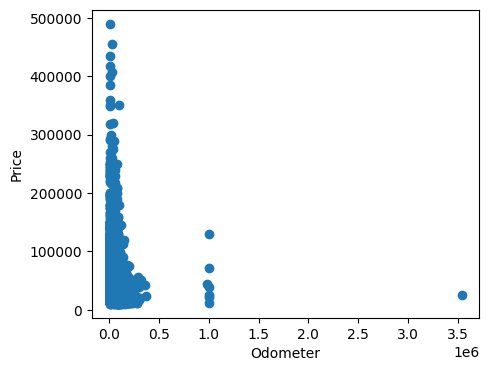

In [1721]:
#using scatterplots 
fig,ax=plt.subplots(figsize=(5,4))
ax.scatter(df['odometer'],df['price'])
ax.set_xlabel('Odometer')
ax.set_ylabel('Price')

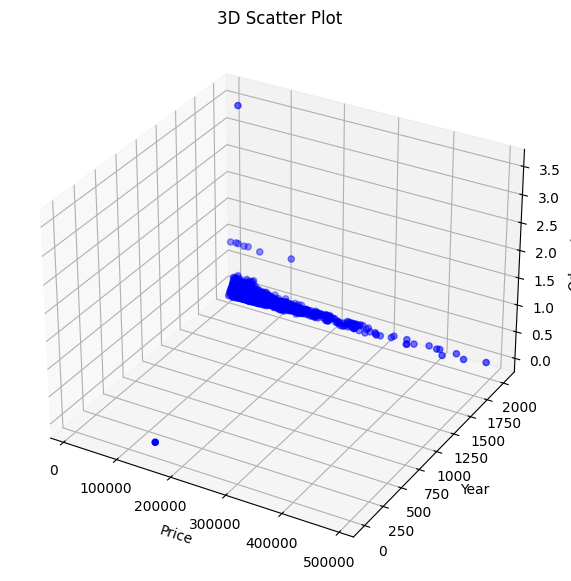

In [1722]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot with 3 features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['price'], df['year'], df['odometer'], c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Odometer')
ax.set_title('3D Scatter Plot')

plt.show()

## 6.2 Outlier detection using IQR

In [1723]:
#outlier detection-IQR
use_columns = [ 'price', 'year', 'odometer' ]
q1=df[use_columns].quantile(0.25)
q3=df[use_columns].quantile(0.75)
IQR=q3-q1
Lower_Whisker=q1-(1.5*IQR)
Upper_Whisker=q3+(1.5*IQR)
print("First quartile for each use column :")
print( q1 )
print("\nThird quartile for each use column :")
print( q3 )
print("\nInterquartile Range for each use column :")
print( IQR )
print("\nLower Whisker for each use column :")
print( Lower_Whisker )
print("\nUpper Whisker for each use column :")
print( Upper_Whisker )
outliers_finder = ((df[use_columns] < Lower_Whisker) | (df[use_columns] > Upper_Whisker) ).any(axis=1)
outliers_result = df[outliers_finder]
#the outliers present in the dataset
print("\n\nnumber of outliers: ",outliers_result.shape[0])

First quartile for each use column :
price       21950.0
year         1966.0
odometer    17506.0
Name: 0.25, dtype: float64

Third quartile for each use column :
price       53937.50
year         1998.00
odometer    78426.25
Name: 0.75, dtype: float64

Interquartile Range for each use column :
price       31987.50
year           32.00
odometer    60920.25
dtype: float64

Lower Whisker for each use column :
price      -26031.250
year         1918.000
odometer   -73874.375
dtype: float64

Upper Whisker for each use column :
price       101918.750
year          2046.000
odometer    169806.625
dtype: float64


number of outliers:  598


In [1724]:
#dataset with removed outliers 
removed_outlier= ( (df[use_columns] >= Lower_Whisker) & (df[use_columns] <= Upper_Whisker) ).all(axis=1)
df_removed_outlier=df[removed_outlier]
print('Count of df after removing  outlier: ',df_removed_outlier.shape[0])

Count of df after removing  outlier:  7216


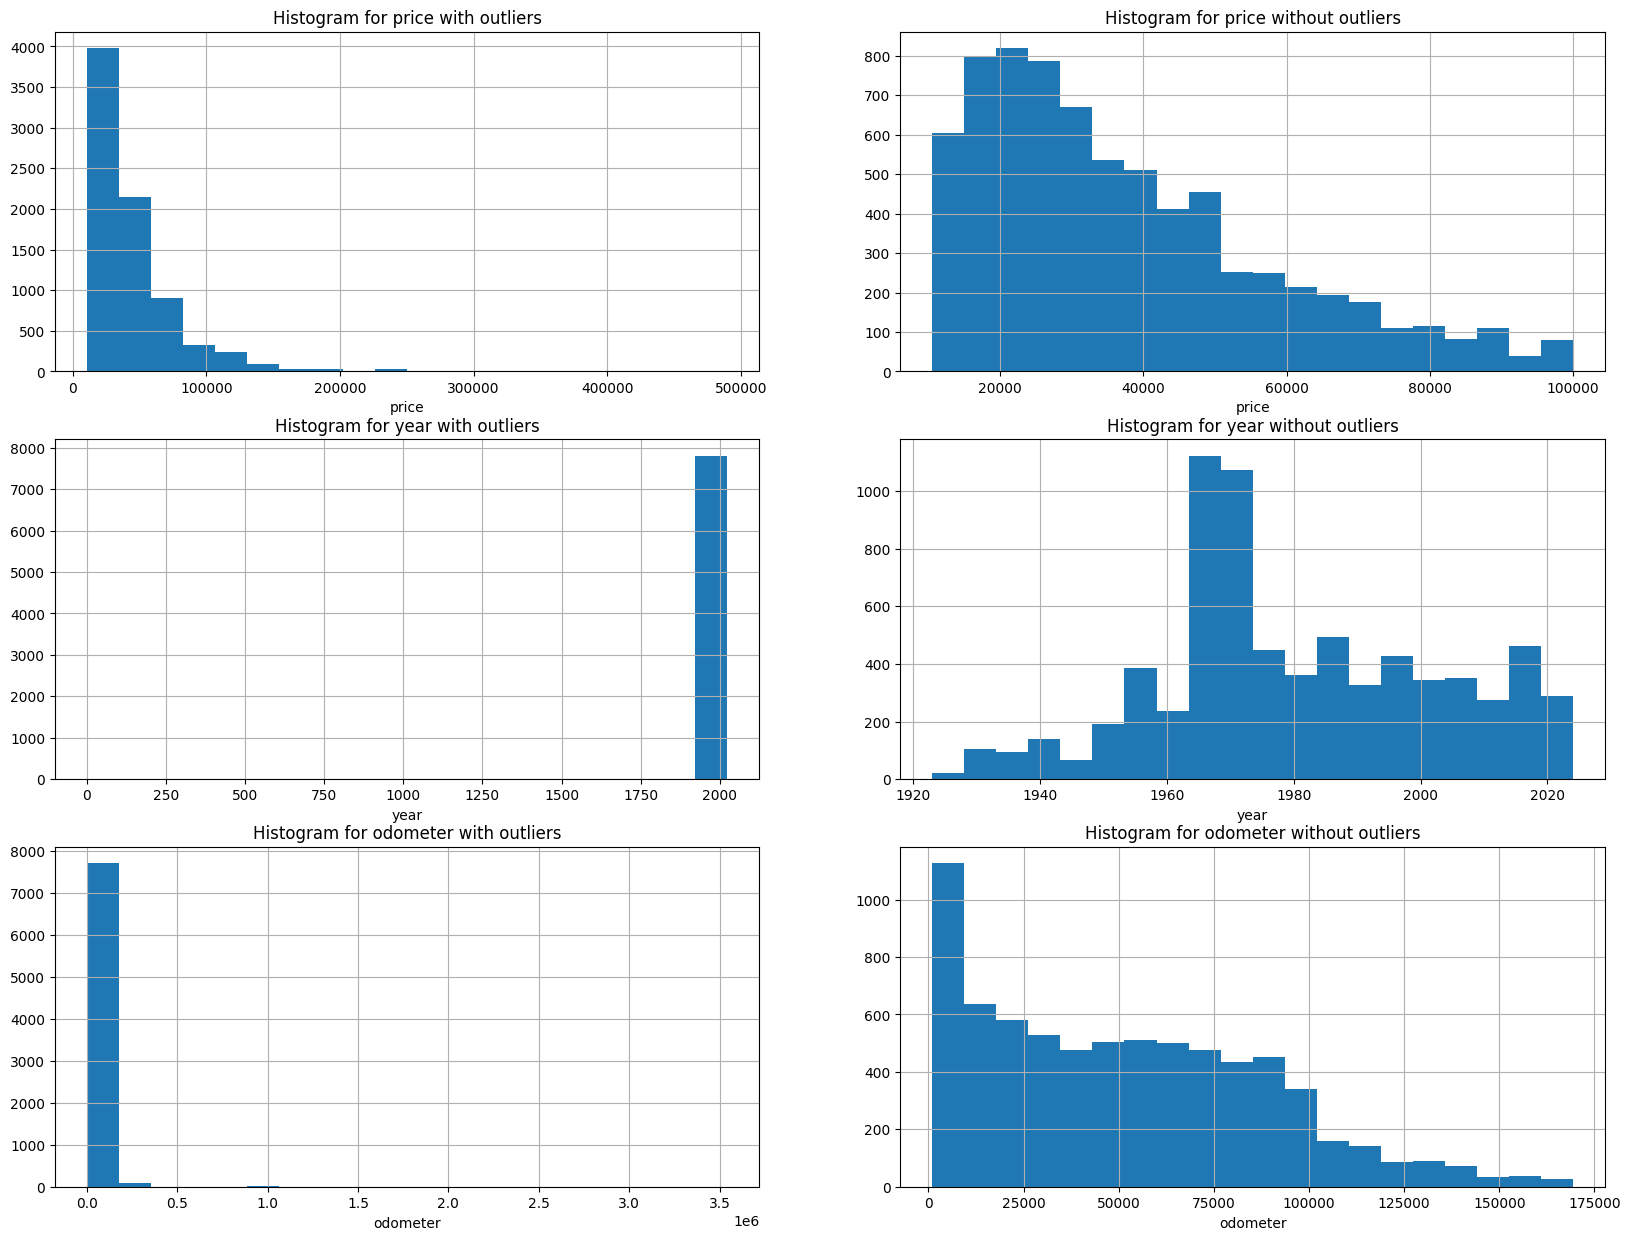

In [1725]:
### Drawing histogram for each column for data with and without outliers
columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (20, 15))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df[col].hist(bins = 20)
    plt.title("Histogram for %s with outliers"%col)
    plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    df_removed_outlier[col].hist(bins = 20)
    plt.title("Histogram for %s without outliers"%col)
    plt.xlabel(col)
plt.show()

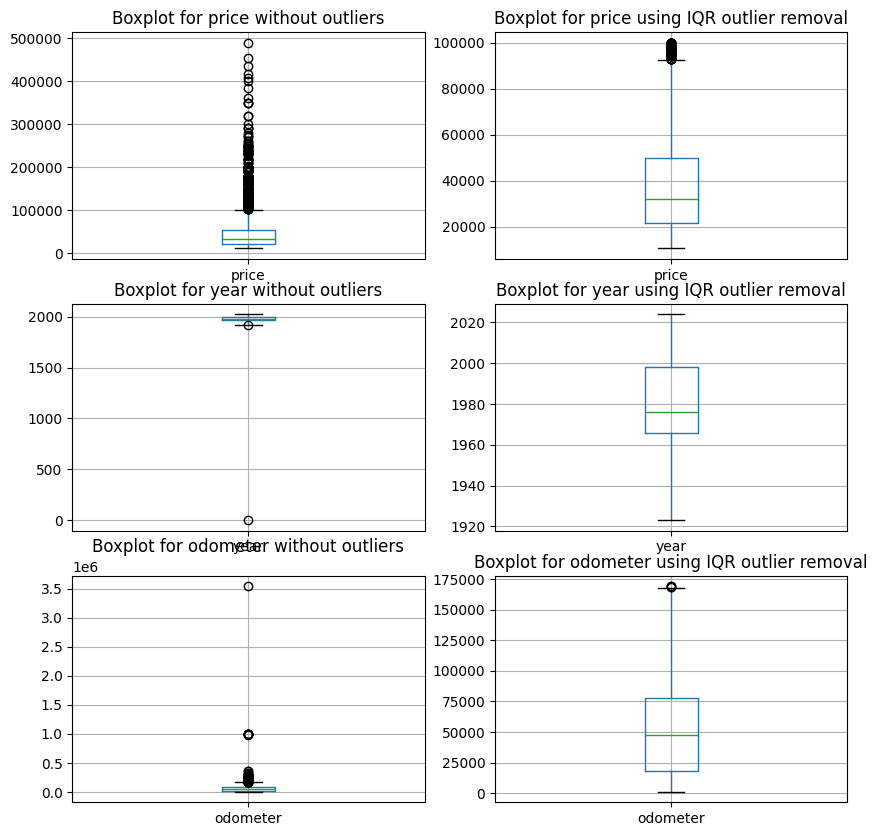

In [1726]:
## Compare using Boxplot
use_columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (10, 10))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without outliers"%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    df_removed_outlier.boxplot(column=col)
    plt.title("Boxplot for %s using IQR outlier removal"%col)
    #plt.xlabel(col)
plt.show()

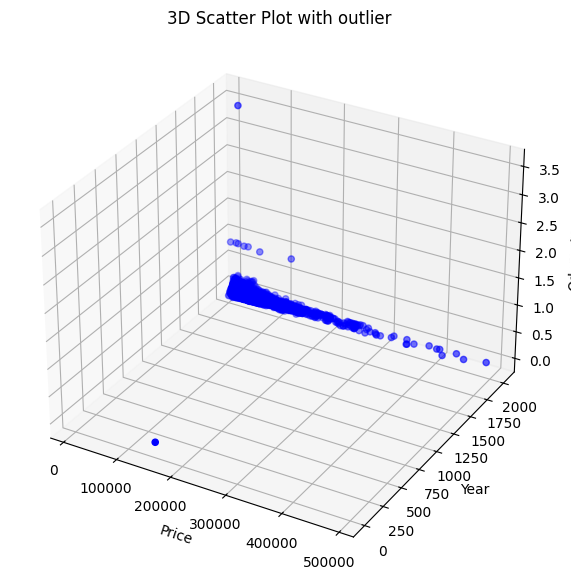

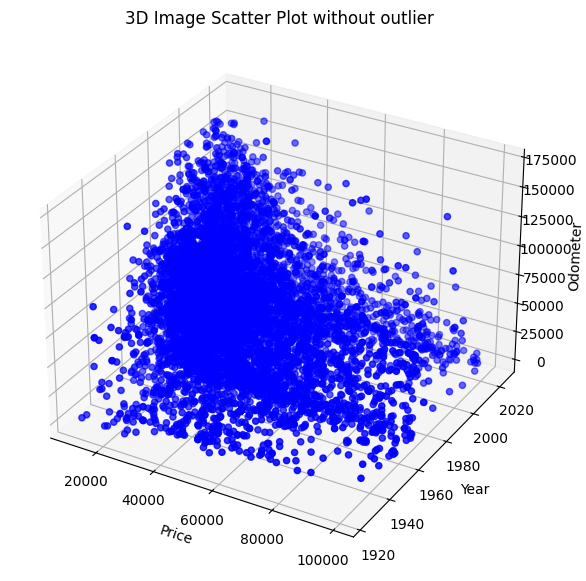

In [1727]:
# Scatter plot with 3 features
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['price'], df['year'], df['odometer'], c='blue', marker='o')

# Set labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Odometer')
ax.set_title('3D Scatter Plot with outlier')

plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_removed_outlier['price'], df_removed_outlier['year'], df_removed_outlier['odometer'], c='blue', marker='o')

# labels and title
ax.set_xlabel('Price')
ax.set_ylabel('Year')
ax.set_zlabel('Odometer')
ax.set_title('3D Image Scatter Plot without outlier')

plt.show()

In [1728]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Subplots which display plots side by side
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]])

# Scatter plot for the 1st subplot
fig.add_trace(go.Scatter3d(
    x=df['price'],
    y=df['year'],
    z=df['odometer'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
), row=1, col=1)

# Scatter plot for the 2nd subplot
fig.add_trace(go.Scatter3d(
    x=df_removed_outlier['price'],
    y=df_removed_outlier['year'],
    z=df_removed_outlier['odometer'],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    )
), row=1, col=2)

# Update layout for each subplot
fig.update_layout(scene=dict(
    xaxis_title='Price',
    yaxis_title='Year',
    zaxis_title='Odometer'
), title='3D Scatter Plot with  and without outlier')

# Show the plot
fig.show()


##  6.2.1 Quantile based flooring and capping

In [1729]:
# create a list of features to be apply flooring and capping
use_columns = [ 'price' ,'year','odometer']
floor = df[use_columns].quantile(0.05)
cap   = df[use_columns].quantile(0.95)

print('floor:\n',floor)
print('\ncap:\n',cap)

floor_cap = ((df[use_columns] > floor) & (df[use_columns] < cap) ).all(axis=1)
floor_cap_df = df[floor_cap]
print('\nShape of dataset after floor and cap:',floor_cap_df.shape)
print('\nShape of dataset before floor and cap:',df.shape)


floor:
 price       13500.0
year         1946.0
odometer     2600.0
Name: 0.05, dtype: float64

cap:
 price       113996.75
year          2018.00
odometer    127000.00
Name: 0.95, dtype: float64

Shape of dataset after floor and cap: (5662, 17)

Shape of dataset before floor and cap: (7814, 17)


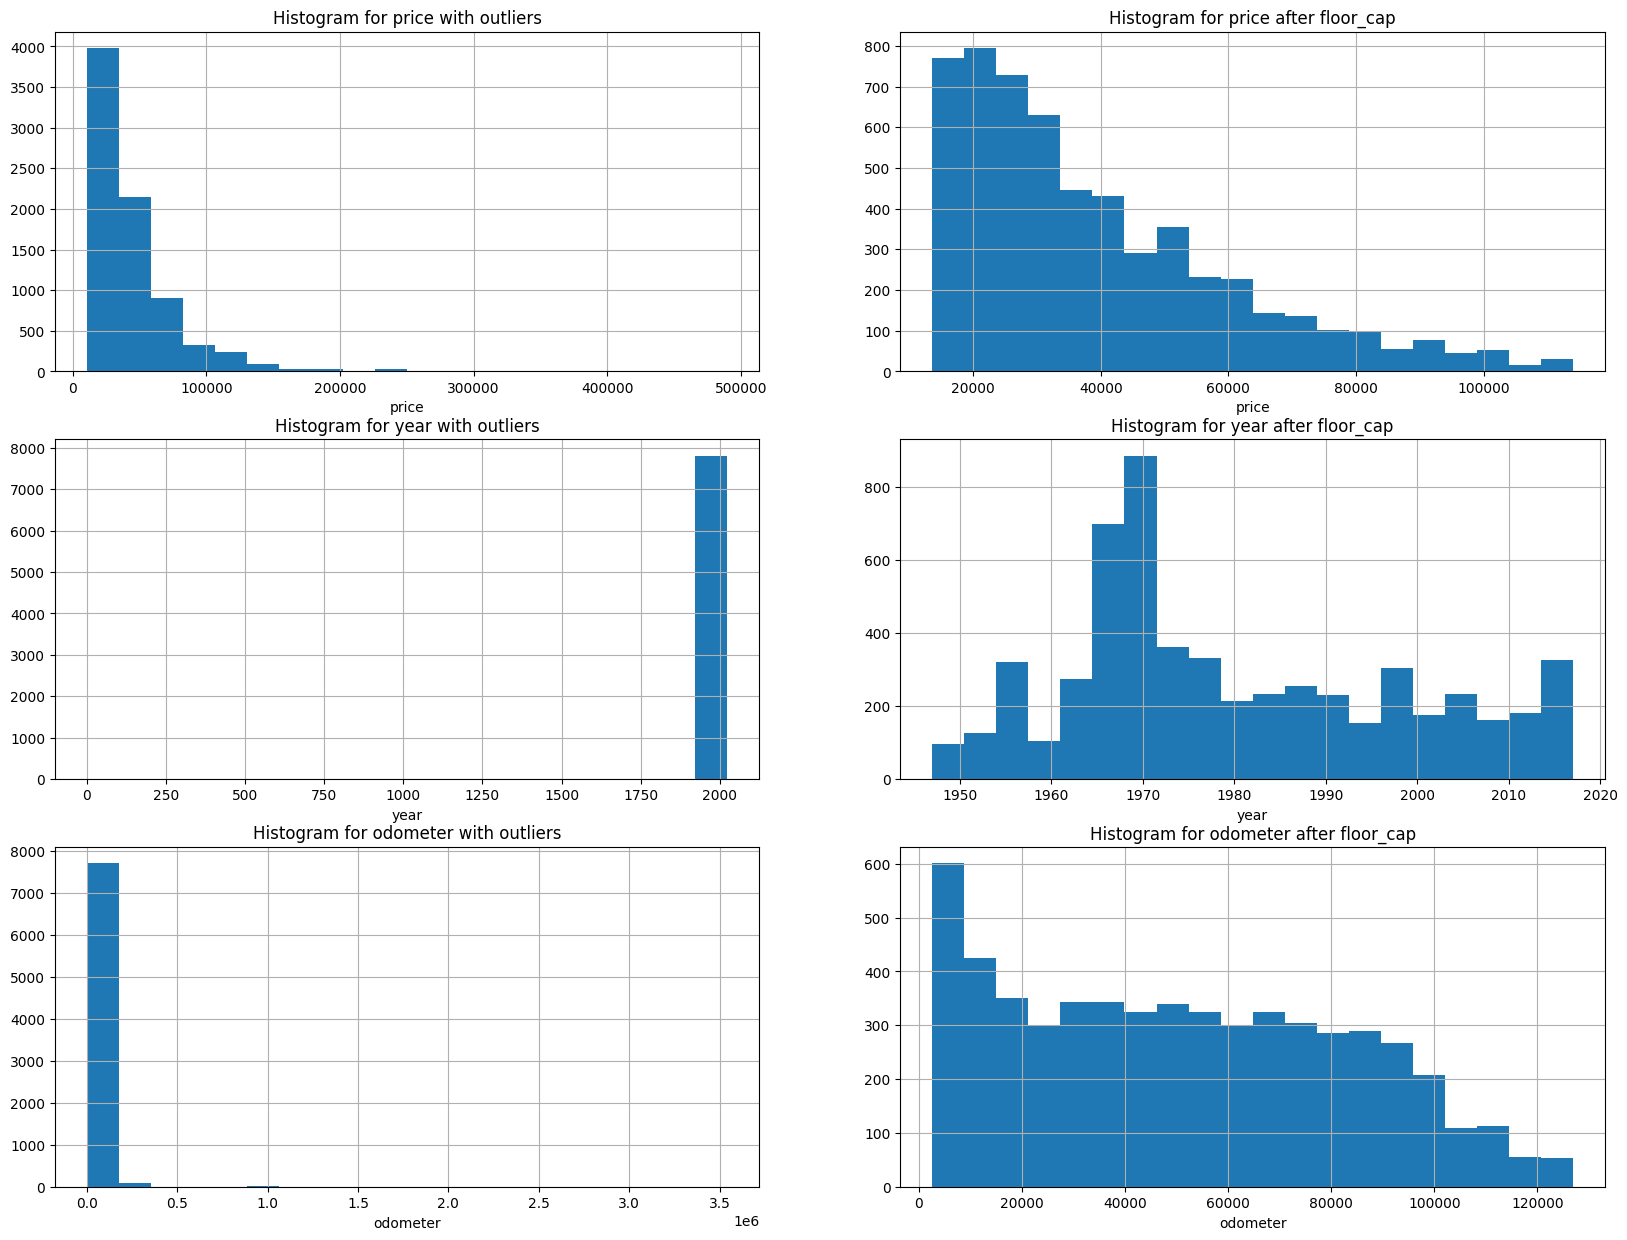

In [1730]:
### Drawing histogram for each column for data with and without outliers
columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (20, 15))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df[col].hist(bins = 20)
    plt.title("Histogram for %s with outliers"%col)
    plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    floor_cap_df[col].hist(bins = 20)
    plt.title("Histogram for %s after floor_cap"%col)
    plt.xlabel(col)
plt.show()

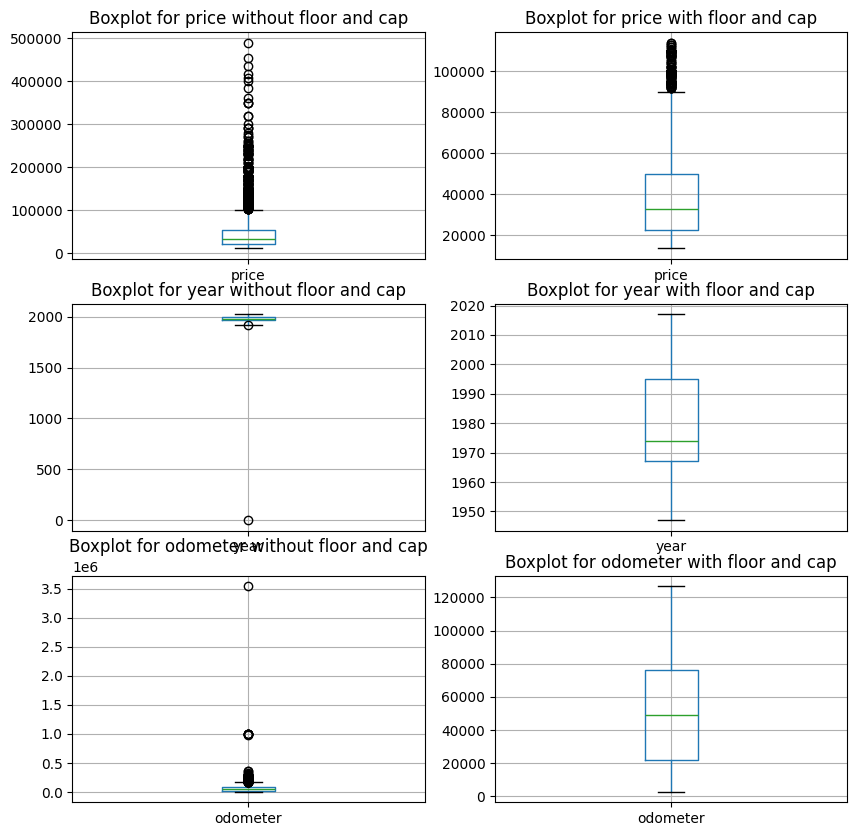

In [1731]:
## Compare using Boxplot
use_columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (10, 10))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without floor and cap"%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    floor_cap_df.boxplot(column=col)
    plt.title("Boxplot for %s with floor and cap"%col)
    #plt.xlabel(col)
plt.show()

### 7.2.2 Trimming

In [1732]:
#define trimming using Lower_Whisker and Upper_whisker
use_columns = [ 'price' ,'year','odometer']
df2 = df.copy()
idx_trimmed = ( (df2[use_columns] >=Lower_Whisker) & (df2[use_columns] <=Upper_Whisker) ).all(axis=1)
trimmed_df = df2[idx_trimmed]
print('original dataframe: ',df2.shape)
print('Trimmed dataframe: ',trimmed_df.shape)

original dataframe:  (7814, 17)
Trimmed dataframe:  (7216, 17)


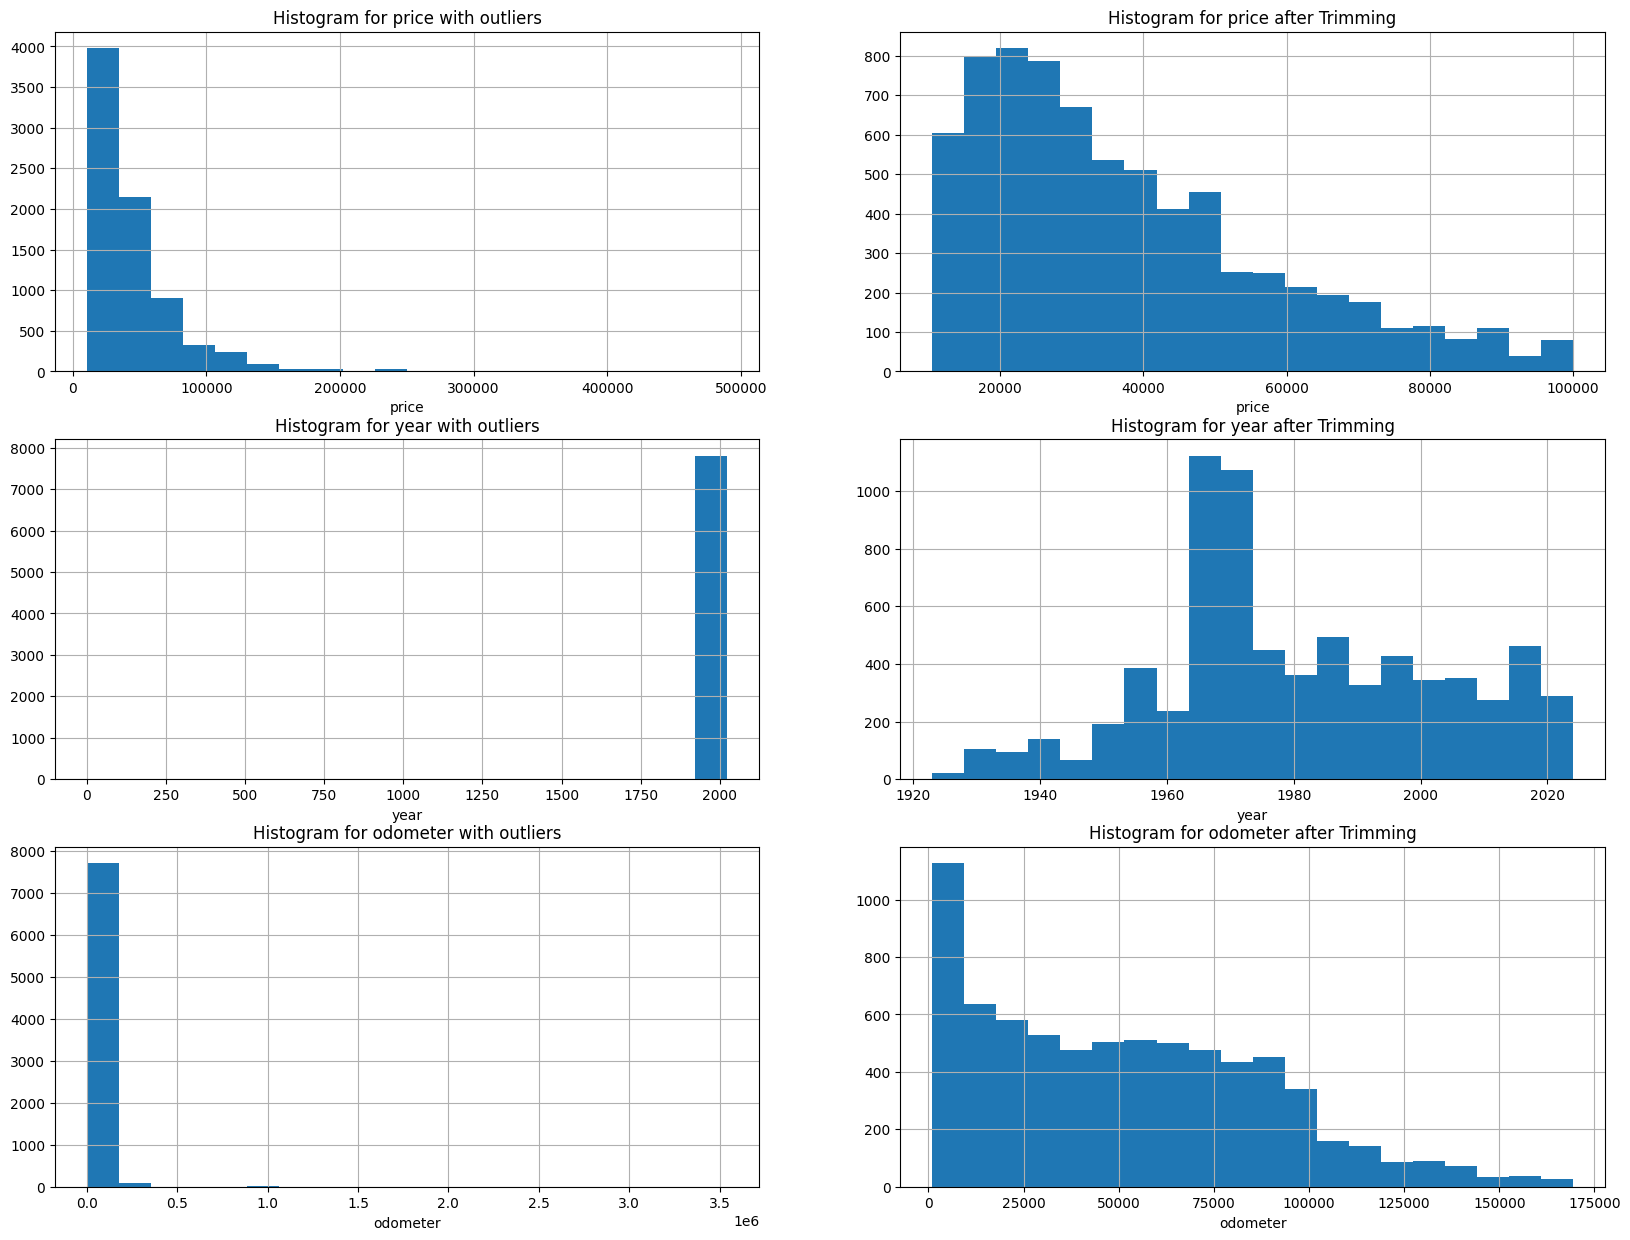

In [1733]:
### Drawing histogram for each column for data with and without outliers
columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (20, 15))
for i , col in enumerate( columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df[col].hist(bins = 20)
    plt.title("Histogram for %s with outliers"%col)
    plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    trimmed_df[col].hist(bins = 20)
    plt.title("Histogram for %s after Trimming"%col)
    plt.xlabel(col)
plt.show()

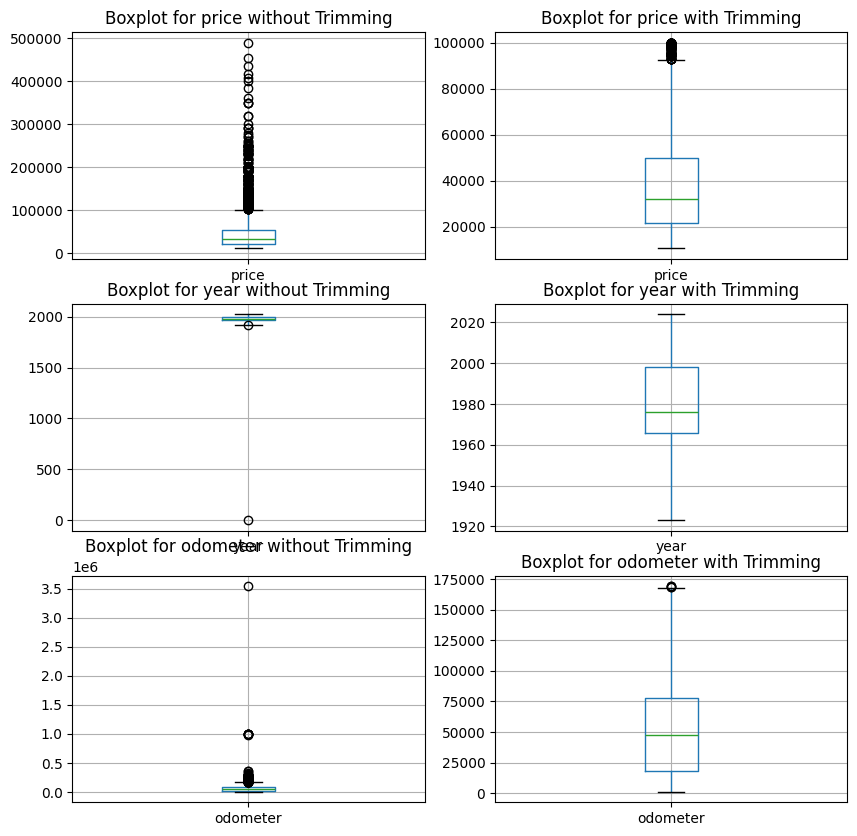

In [1734]:
## Compare using Boxplot
use_columns = [ 'price' ,'year','odometer']
plt.figure(figsize = (10, 10))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 1 )
    df.boxplot(column=col)
    plt.title("Boxplot for %s without Trimming"%col)
    #plt.xlabel(col)
    # Plotting various columns to demonstrate distributions
    plt.subplot( 3 , 2 , 2*i + 2 )
    trimmed_df.boxplot(column=col)
    plt.title("Boxplot for %s with Trimming"%col)
    #plt.xlabel(col)
plt.show()

## 6.2.3 Log Tranform

In [1735]:
log_df=df.copy()

In [1736]:
# For Price
print( " Price Skew : " , log_df["price"].skew().round(2) )

# For Size Sqft
print( "Year Skew  : " , log_df["year"].skew().round(2) )

# For Size Sqft
print( "Odometer Skew  : " , log_df["odometer"].skew().round(2) )


 Price Skew :  3.47
Year Skew  :  -31.91
Odometer Skew  :  23.64


In [1737]:
### For Price
log_df["log_price"] = log_df["price"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log Price Skew : " , log_df["log_price"].skew().round(2) )

### For Year
log_df["log_year"] = log_df["year"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log year Skew : " , log_df["log_year"].skew().round(2) )

### For Odometer
log_df["log_odometer"] = log_df["odometer"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log odometer Skew : " , log_df["log_odometer"].skew().round(2) )



Log Price Skew :  0.47
Log year Skew :  -86.21
Log odometer Skew :  -0.95


In [1738]:
print('Original dataframe: ',df.shape)
print('Log transformed dataframe: ',log_df.shape)

Original dataframe:  (7814, 17)
Log transformed dataframe:  (7814, 20)


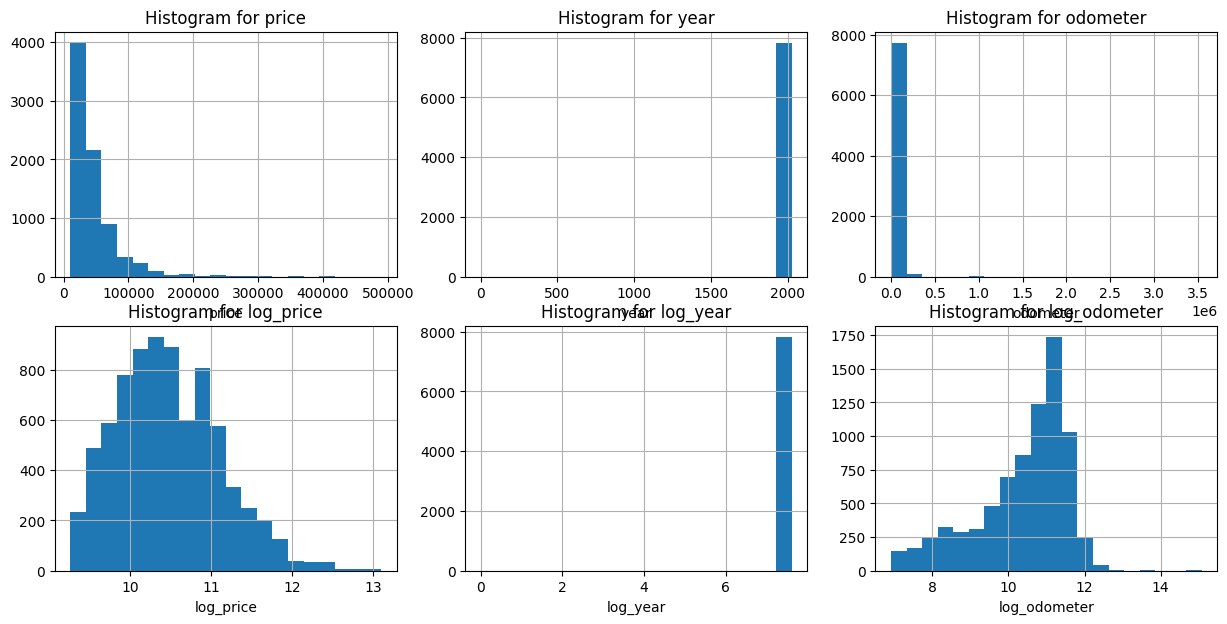

In [1739]:
### Drawing histogram for price and size_sqft
use_columns = ['price','year','odometer','log_price','log_year','log_odometer']
plt.figure(figsize = (15, 7))
for i , col in enumerate( use_columns ):
    # Plotting various columns to demonstrate distributions
    plt.subplot( 2 , 3 , i + 1 )
    log_df[col].hist(bins = 20)
    plt.title("Histogram for %s"%col)
    plt.xlabel(col)
plt.show()

### Outlier removing methods analysis:
While analyzing outlier removing techniques such as Quantile-based flooring and capping, Trimming, and Log transformation, each technique has pros and cons. In Quantile-based flooring and capping, the data lose is comparatively high. Log transform method give better result in the features price and odometer. Hence we choose for the same. In case of feature 'year', trimming gives better result. Hence we combine these outlier removel techniques.


In [1741]:
# Remove outlier in feature year using Trimming
use_columns = [ 'year']
df5 = df.copy()
idx_trimmed = df5[(df5['year'] >=Lower_Whisker['year']) & (df5['year'] <=Upper_Whisker['year'])]
trimmed_df = idx_trimmed
# Remove outlier from feature  odometer using log transformation
log_df1 = trimmed_df.copy()
log_df["log_odometer"] = log_df["odometer"].map( lambda i : np.log(i) if i > 0 else 0 )
print( "Log odometer Skew : " , log_df["log_odometer"].skew().round(2) )


Log odometer Skew :  -0.95


In [1742]:
log_df['price'].isnull().sum()

0

In [1743]:
# Remove outlier from price using flooe=r cap method.
floor = log_df['price'].quantile(0.05)
cap   = log_df['price'].quantile(0.95)

print('floor:\n',floor)
print('\ncap:\n',cap)

df_temp = log_df.copy()
df_temp['price'] = np.where(df_temp['price']<floor,floor,df_temp['price'])
df_temp['price'] = np.where(df_temp['price']>cap,cap,df_temp['price'])

df_temp2 =log_df.copy()
# df_temp2['price'] = df_temp2[(df_temp2['price']>floor) and (df_temp2['price']<cap)]
df_temp2 = df_temp2[(df_temp2['price'] > floor) & (df_temp2['price'] < cap)]

floor:
 13500.0

cap:
 113996.75


In [1744]:
final_df=df_temp.copy()
final_df2=df_temp2.copy()


## 7. Modeling Techniques

In [1745]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
# select columns for Standardisation. 
selected_cols=['make_freq','interiorColor_freq','exterior_freq','model_freq','state_freq']
other_cols=['log_year','log_odometer','transmission_automatic']

final_df[selected_cols] = scaler.fit_transform(final_df[selected_cols])

X = final_df[['log_year','log_odometer','make_freq','interiorColor_freq','exterior_freq','model_freq','state_freq','transmission_automatic']]
y = final_df['price'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)



## 7.1 Linear Regression

Coefficients: [-11473.51394514  -7149.22822073    899.36311027   1827.93408249
  -1649.73624878   1125.81742499  -1108.20113881  -8390.0946777 ]
Intercept: 208376.7391954376
R-squared: 0.14925403916314295
Mean Squared Error (MSE): 624963403.53
Root Mean Squared Error (RMSE): 24999.27
R-squared (R^2): 0.15


c:\Users\sudhy\.conda\envs\tf-gpu\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



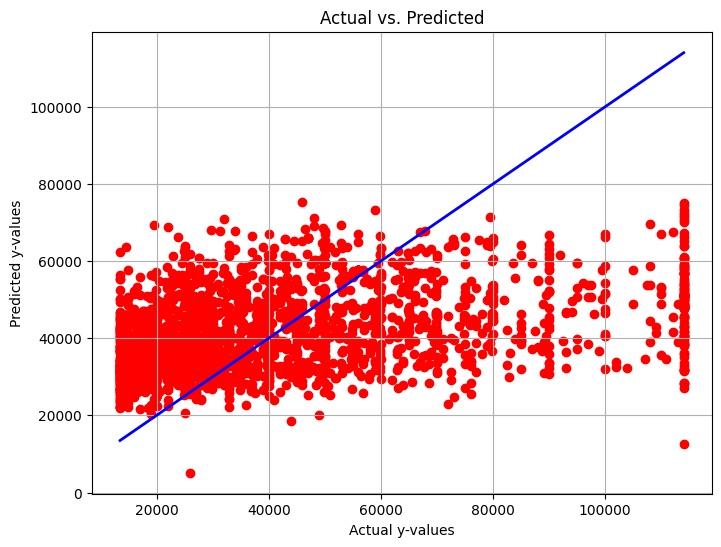

In [1746]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

# Graphical representation of model result
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b-', linewidth=2)
plt.xlabel('Actual y-values')
plt.ylabel('Predicted y-values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


## 7.2 Random Forest Regression

Mean Squared Error (MSE): 395622805.95
Root Mean Squared Error (RMSE): 19890.27
R-squared (R^2): 0.46


c:\Users\sudhy\.conda\envs\tf-gpu\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



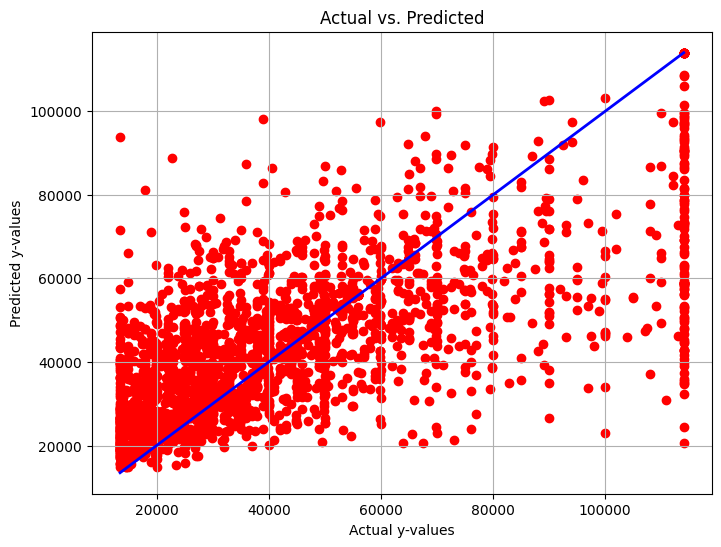

In [1747]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=11)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b-', linewidth=2)
plt.xlabel('Actual y-values')
plt.ylabel('Predicted y-values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

## 7.3 Polynomial Regressor with Degree 2

Best parameters: {'alpha': 10, 'fit_intercept': False}
Mean Squared Error (MSE): 610067032.74
Root Mean Squared Error (RMSE): 24699.54
R-squared (R^2): 0.17


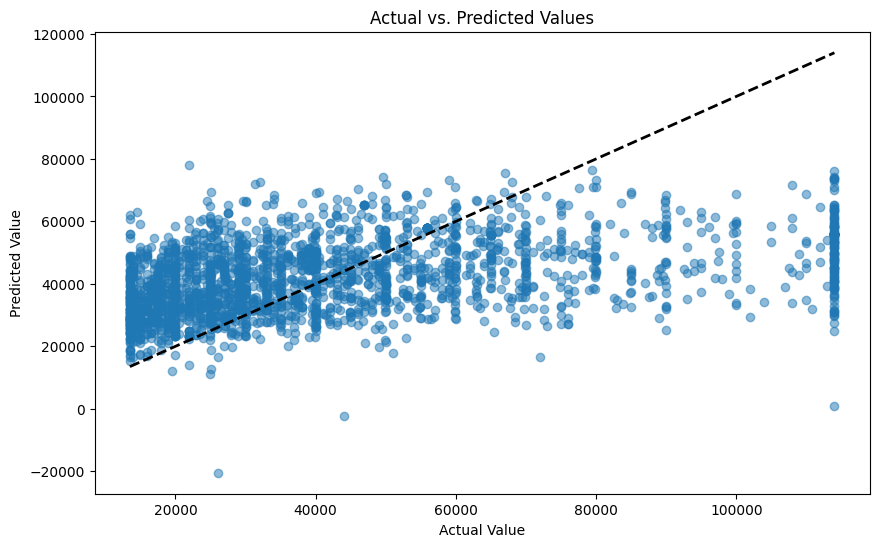

In [1748]:


# PolynomialFeatures object , degree=2 
polynomial_features = PolynomialFeatures(degree=2)

# Transforming x_train data to polynomial features
X_train_poly = polynomial_features.fit_transform(X_train)

# Transforming  X_test  to  polynomial features
X_test_poly = polynomial_features.transform(X_test)

# Creating a Ridge Regression 
model = Ridge()

# Define the grid of hyperparameters to search
grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Set up the grid search with 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=11)
grid_search = GridSearchCV(model, grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model with best hyperparameters
grid_search.fit(X_train_poly, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Fit the model with the best parameters
model = grid_search.best_estimator_

# Prediction
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Ploting actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.show()

## 7.4 Polynomial Regression with Degree 3

Best parameters: {'alpha': 100, 'fit_intercept': False}
Mean Squared Error (MSE): 570781686.27
Root Mean Squared Error (RMSE): 23891.04
R-squared (R^2): 0.22


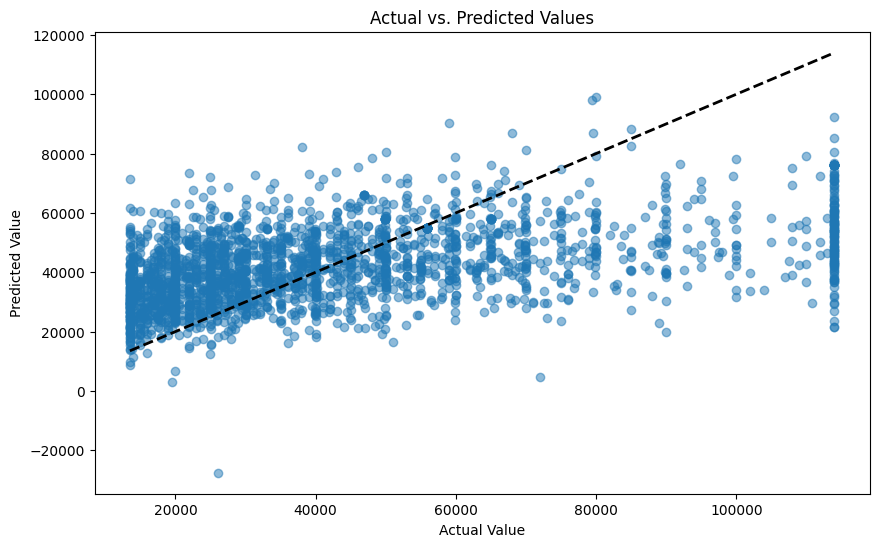

In [1749]:


# PolynomialFeatures object , degree=3 
polynomial_features = PolynomialFeatures(degree=3)

# Transforming x_train data to polynomial features
X_train_poly = polynomial_features.fit_transform(X_train)

# Transforming  X_test  to  polynomial features
X_test_poly = polynomial_features.transform(X_test)

# Creating a Ridge Regression 
model = Ridge()

# Define the grid of hyperparameters to search
grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Set up the grid search with 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=11)
grid_search = GridSearchCV(model, grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model with best hyperparameters
grid_search.fit(X_train_poly, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Fit the model with the best parameters
model = grid_search.best_estimator_

# Prediction
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Ploting actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.show()

## 7.5 Linear Regressor using Trimmed dataset

Coefficients: [-189012.91517945   -5083.86153037    1155.20649401    1416.96412318
   -1550.81025956     932.48237028    -906.47088828   -4291.03885627]
Intercept: 1530021.495384624
R-squared: 0.1371201168719901
Mean Squared Error (MSE): 381496395.31
Root Mean Squared Error (RMSE): 19531.93
R-squared (R^2): 0.14


c:\Users\sudhy\.conda\envs\tf-gpu\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



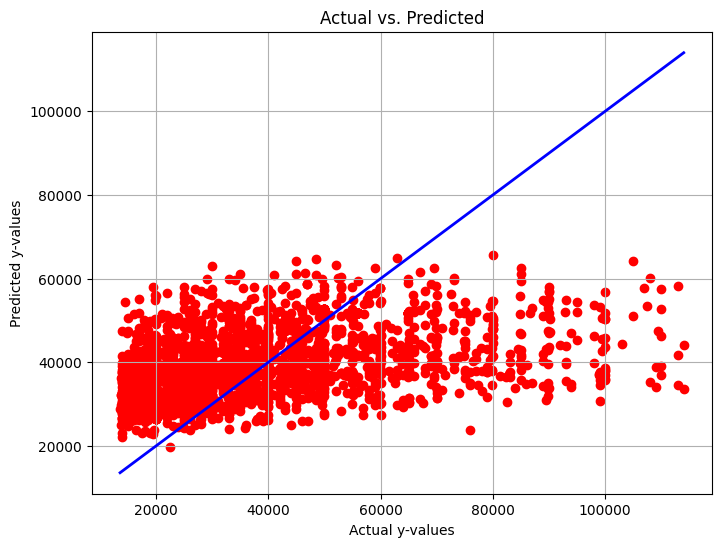

In [1750]:
final_df2[selected_cols] = scaler.fit_transform(final_df2[selected_cols])

X = final_df2[['log_year','log_odometer','make_freq','interiorColor_freq','exterior_freq','model_freq','state_freq','transmission_automatic']]
y = final_df2['price'] 


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluation
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared:', model.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b-', linewidth=2)
plt.xlabel('Actual y-values')
plt.ylabel('Predicted y-values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


## 7.6 Random Forest Regressor using trimmed dataset

Mean Squared Error (MSE): 267241596.69
Root Mean Squared Error (RMSE): 16347.53
R-squared (R^2): 0.40


c:\Users\sudhy\.conda\envs\tf-gpu\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



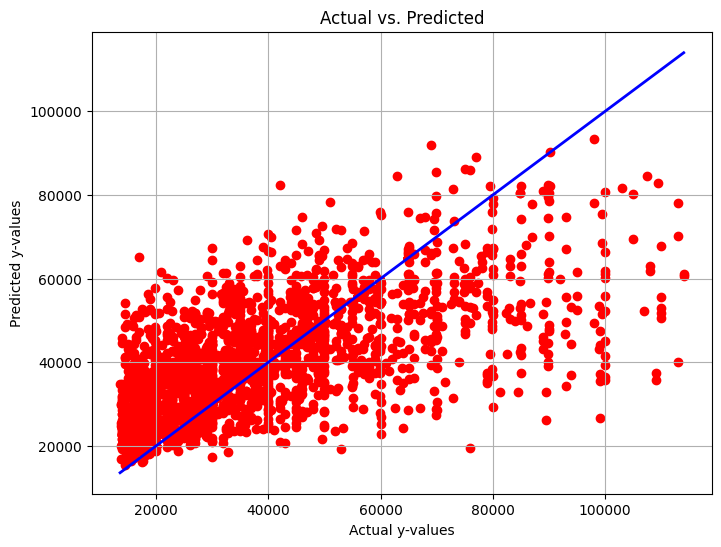

In [1751]:
# Create Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=11)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R^2): {r2:.2f}')


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'b-', linewidth=2)
plt.xlabel('Actual y-values')
plt.ylabel('Predicted y-values')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

## 7.7 Polynomial regressor with Degree 2 using trimmed dataset

Best parameters: {'alpha': 0.001, 'fit_intercept': True}
Mean Squared Error (MSE): 363768707.51
Root Mean Squared Error (RMSE): 19072.72
R-squared (R^2): 0.18


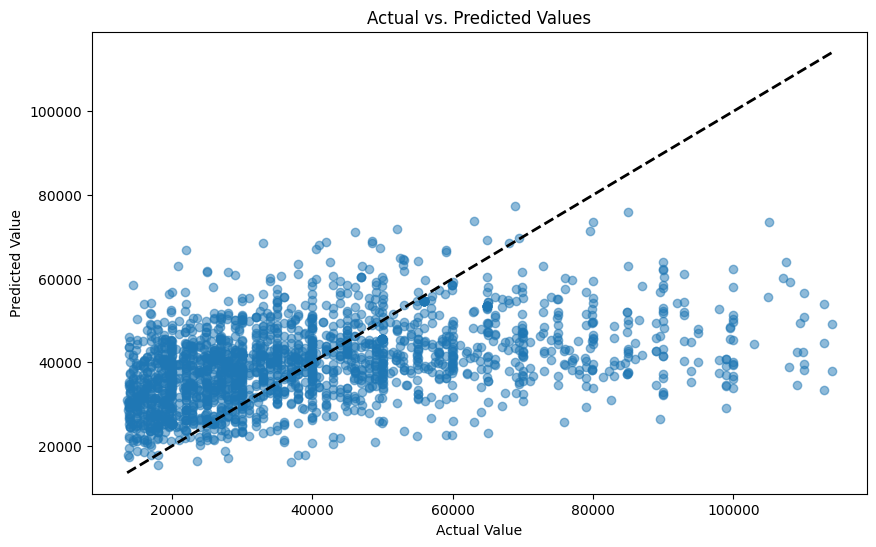

In [1752]:


# PolynomialFeatures object , degree=2 
polynomial_features = PolynomialFeatures(degree=2)

# Transforming x_train data to polynomial features
X_train_poly = polynomial_features.fit_transform(X_train)

# Transforming  X_test  to  polynomial features
X_test_poly = polynomial_features.transform(X_test)

# Creating a Ridge Regression 
model = Ridge()

# Define the grid of hyperparameters to search
grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Set up the grid search with 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=11)
grid_search = GridSearchCV(model, grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model with best hyperparameters
grid_search.fit(X_train_poly, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Fit the model with the best parameters
model = grid_search.best_estimator_

# Prediction
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Ploting actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.show()

## 7.8 Polynomial regressor with Degree 3 using trimmed dataset

Best parameters: {'alpha': 0.001, 'fit_intercept': True}
Mean Squared Error (MSE): 350902647.50
Root Mean Squared Error (RMSE): 18732.40
R-squared (R^2): 0.21


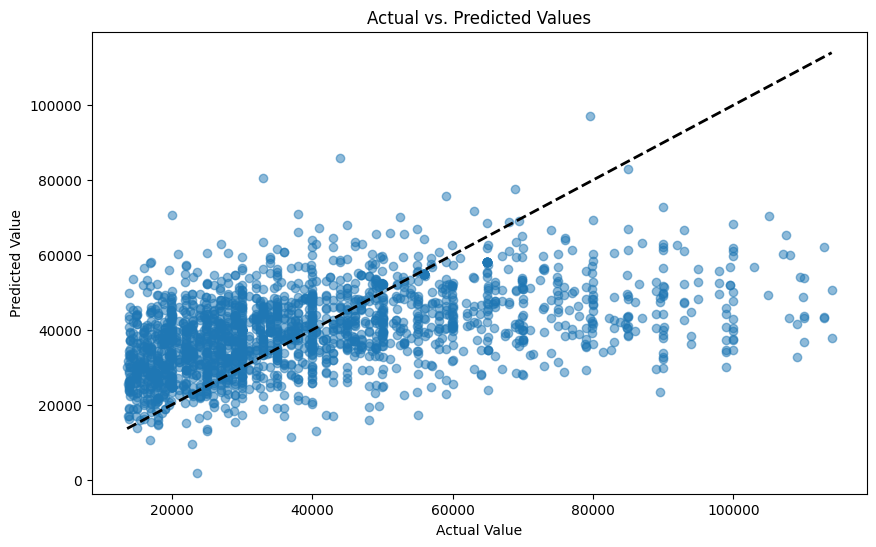

In [1753]:


# PolynomialFeatures object , degree=3 
polynomial_features = PolynomialFeatures(degree=3)

# Transforming x_train data to polynomial features
X_train_poly = polynomial_features.fit_transform(X_train)

# Transforming  X_test  to  polynomial features
X_test_poly = polynomial_features.transform(X_test)

# Creating a Ridge Regression 
model = Ridge()

# Define the grid of hyperparameters to search
grid = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Set up the grid search with 5-fold cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=11)
grid_search = GridSearchCV(model, grid, cv=kfold, scoring='neg_mean_squared_error')

# Fit the model with best hyperparameters
grid_search.fit(X_train_poly, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Fit the model with the best parameters
model = grid_search.best_estimator_

# Prediction
y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Ploting actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Actual vs. Predicted Values')
plt.show()

## 8 NLP Techniques

In [1754]:
#Load the desciptive data
df_nlp=final_df[['description']].sample(5000).copy()


In [1755]:
#Remove the \n    
df_nlp['description'] = df_nlp['description'].apply(lambda x: str(x).replace('\n'," "))
df_nlp['raw_Description'] =df_nlp['description']


In [1756]:
## In 'description' column we applying various processing for analysis.
## Initially removing White spaces from the description

def stripWhiteSpaces(description):
    if isinstance(description, str):
        stripped_description = [str(value).strip() for value in sent_tokenize(description) if value]
        new_description = " ".join(stripped_description)
        return new_description
    else:
        return str(description)

df_nlp['description'] = df_nlp['description'].apply(stripWhiteSpaces)
pd.set_option('display.max_colwidth', None)
print(df_nlp['description'].head(20))

15013                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [1757]:
## Removing Stop words from each row
from nltk.corpus import stopwords
import string

stopwords_list=list(stopwords.words('english'))
stopwords_list=stopwords_list+['car','vehicle']
def stopwordRemover(values):
    word_tokens = [value for value in word_tokenize(values) if (value.lower() not in stopwords_list) and (len(value)>2)]
    new_description = ' '.join(word_tokens)
    
    # Removing punctuations
    punctuations_removed_description=new_description.translate(str.maketrans('','',string.punctuation))
    return punctuations_removed_description

df_nlp['description_cleaned'] = df_nlp['description'].apply(stopwordRemover)
df_nlp['description_cleaned'].head(5)

15013                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [1758]:
import demoji #Used for converting emoji to word 
from spellchecker import SpellChecker #For spell check and fixes


demoji.download_codes()

# Initialize SpellChecker for correcting word spellings
sc = SpellChecker()


df_nlp['description_cleaned'] = df_nlp['description_cleaned'].apply(lambda value: demoji.replace_with_desc(value))


C:\Users\sudhy\AppData\Local\Temp\ipykernel_11448\4226319112.py:5: FutureWarning:

The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.



In [1759]:
# to remove all numerical values
def digitCleaner(descriptions):
    description = word_tokenize(descriptions)
    new_values=[]
    for x in description:
        x_new = re.sub(r'\d', '', x)
        new_values.append(x_new)

    return new_values

df_nlp['description_cleaned'] = df_nlp['description_cleaned'].apply(lambda description: digitCleaner(description))
df_nlp['description_cleaned']

15013                                                                                      [, miles, one, nicest, , Trans, Ams, ll, find, PHS, documents, hand, Factory, Pre, Delivery, Inspection, markings, PDI, , still, underside, hood, Completely, original, except, tires, new, compressor, Paint, Interior, untouched, engine, rare, , TBI, Cross, Fire, Injection, engine, available, Trans, one, year, normally, found, Corvettes, gather, Heater, work, Delco, works, power, locks, windows, work, owner, manual, pieces, paper, besides, PHS, docs, comes, complete, original, turbo, cast, wheels, original, stored, Goodyear, Eagle, tires, hard, find, bowling, ball, wheel, covers, Trans, comes, retractable, cargo, cover, Zero, tears, upholstery, dash, pad, original, thus, cracks, minor, paint, chips, lower, window, rubber, cracked, well, ...]
8853                                                                                                                                                           

In [1760]:
# Perform lemmitization
def lemmatizer(descriptions):
    descriptions_nlp = spacy_nlp(" ".join(descriptions))
    new_vals=[]
    for desc in descriptions_nlp:
        lemma = desc.lemma_
        new_vals.append(lemma)
    return new_vals

# Lemmatization to find the root form of each token
df_nlp['description_cleaned'] = df_nlp['description_cleaned'].apply(lambda descriptions: lemmatizer(descriptions) )

In [1761]:
words = df_nlp['description_cleaned'].apply(lambda description: ' '.join(description)).tolist()
words=" ".join(words)

In [1762]:
# Count words
words=pd.DataFrame({'words':word_tokenize(words)}) 
words.value_counts()


words       
power           6727
engine          4235
wheel           4234
drive           4125
interior        4116
                ... 
autolamp           1
autographed        1
autograph          1
autocrosse         1
brakesDeluxe       1
Name: count, Length: 40850, dtype: int64

In [1763]:
value_counts = pd.DataFrame(words['words'].value_counts())
value_counts

count
words              
power          6727
engine         4235
wheel          4234
drive          4125
interior       4116
...             ...
dashnice          1
shifterblack      1
steeringb         1
rearmanual        1
Tru               1

[40850 rows x 1 columns]

In [1764]:
fig = px.bar(value_counts.iloc[:15][::-1], x='count', title='Word Frequency')
fig.show()

In [1765]:

value_counts = value_counts.reset_index()
value_counts

words  count
0             power   6727
1            engine   4235
2             wheel   4234
3             drive   4125
4          interior   4116
...             ...    ...
40845      dashnice      1
40846  shifterblack      1
40847     steeringb      1
40848    rearmanual      1
40849           Tru      1

[40850 rows x 2 columns]

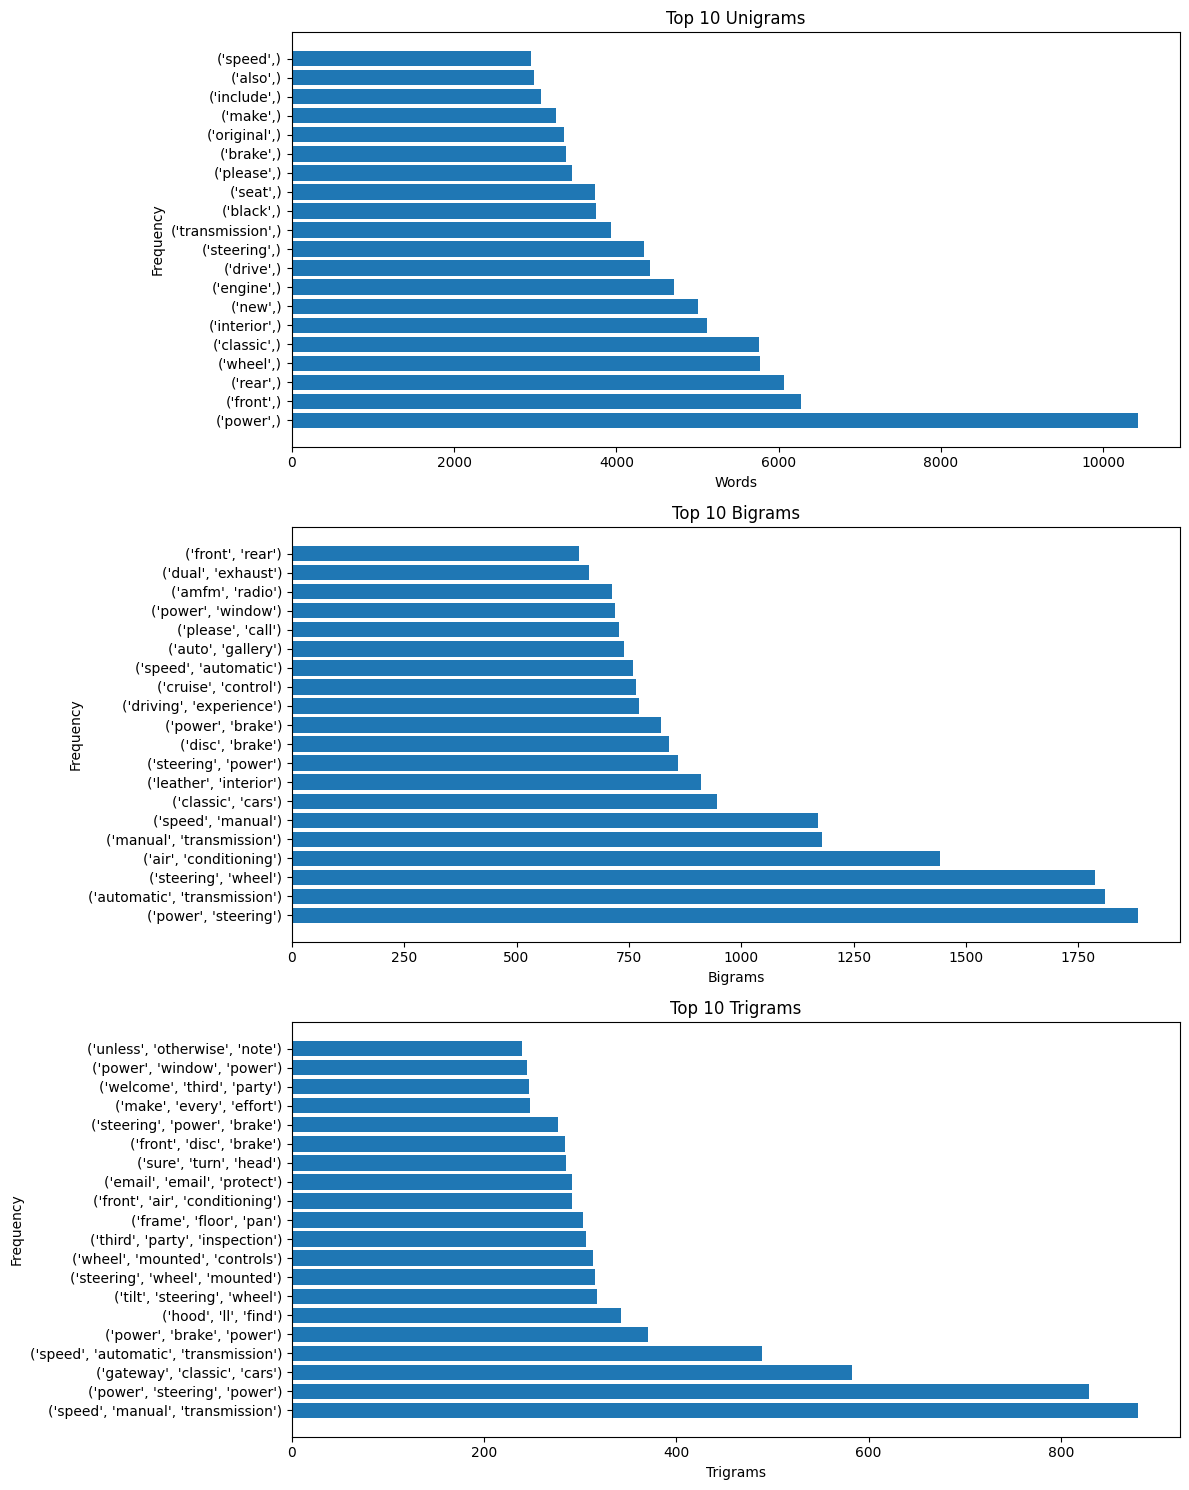

In [1766]:

import collections
import matplotlib.pyplot as plt
import nltk
from nltk.util import ngrams

def ngram(description):
    # Tokenization
    tokens = description.lower().split()

    # Creating of unigrams, bigrams, and trigrams lists
    unigrams = list(ngrams(tokens, 1))
    bigrams = list(ngrams(tokens, 2))
    trigrams = list(ngrams(tokens, 3))

    # Frequency of  unigram, bigram, and trigram
    unigram_counts = collections.Counter(unigrams)
    bigram_counts = collections.Counter(bigrams)
    trigram_counts = collections.Counter(trigrams)

    # HJorizontal bar for top 10 ngrams
    fig, axs = plt.subplots(3, figsize=(12, 15))

    top10_unigrams = dict(unigram_counts.most_common(20))
    axs[0].barh([str(k) for k in top10_unigrams.keys()], top10_unigrams.values())
    axs[0].set_title("Top 10 Unigrams")
    axs[0].set_xlabel("Words")
    axs[0].set_ylabel("Frequency")

    top10_bigrams = dict(bigram_counts.most_common(20))
    axs[1].barh([str(k) for k in top10_bigrams.keys()], top10_bigrams.values())
    axs[1].set_title("Top 10 Bigrams")
    axs[1].set_xlabel("Bigrams")
    axs[1].set_ylabel("Frequency")

    top10_trigrams = dict(trigram_counts.most_common(20))
    axs[2].barh([str(k) for k in top10_trigrams.keys()], top10_trigrams.values())
    axs[2].set_title("Top 10 Trigrams")
    axs[2].set_xlabel("Trigrams")
    axs[2].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


item = [items for subItems in df_nlp['description_cleaned'].tolist() for items in subItems]
ngram(" ".join(item))

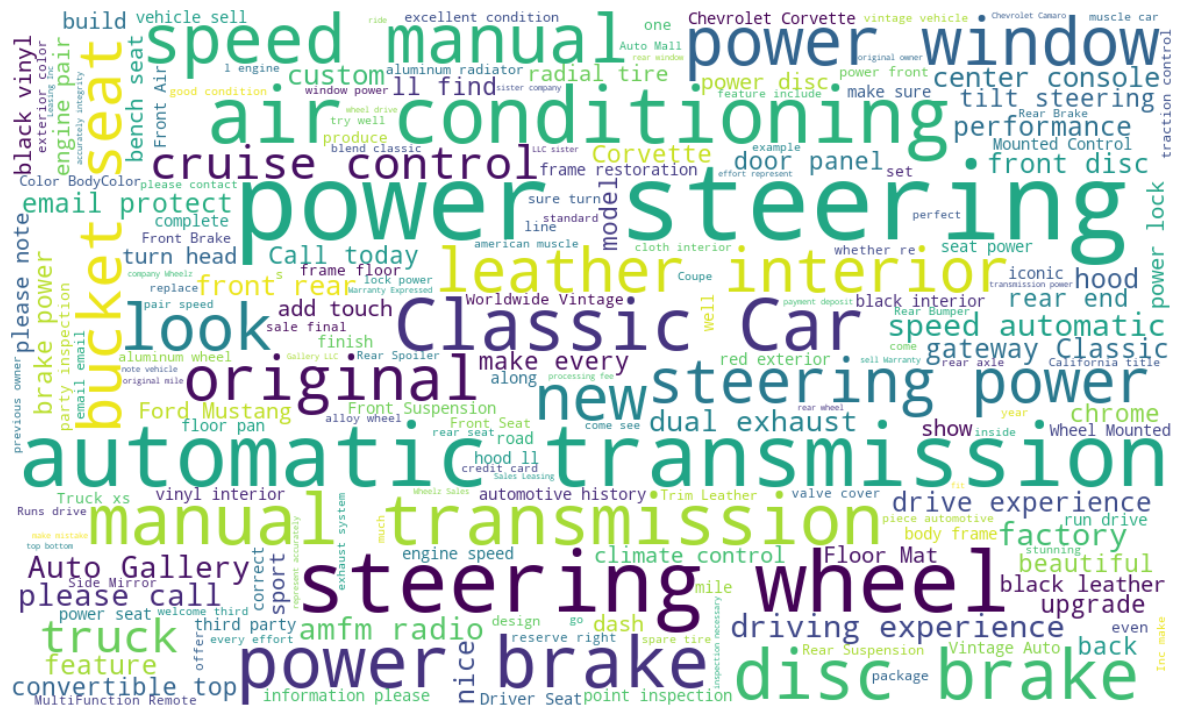

In [1767]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

combined_description=" ".join(item)

#word cloud
wc = WordCloud(width=1000, height=600, background_color="white").generate(combined_description)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

From the above wordcloud, main factors are the transmission type, power, break, steering and original key words. THese are the main key words that is used by the sellers to advertise in the website. So It concluded that these are trending key words used by car sellers in Classic car sector.

# 9. Conclusion


We have concluded that the overall accuracy is comparatively low in every model except random forest regression. Thereby we assume that we got low accuracy in every model because of the noise we are having in the Data. Additionally, we also assume that the feature odometer has 0 values. Also, many other features had missing values. So we couldn’t use that one so we were unable to use those features, so that also affected our models. Our limitation was we could use only a few features and those features contained noise too. Among our models, random forest was the best. However, we used the trimmed dataset. This is normally not recommendable, but for our rare case, this model gave the best accuracy. 


## 10. Future Work
By collecting datas that has less noise if we could use data with less noise we will be will be able to get better results .More than this elaborating the feature set by including more relevant attributes and performing advanced feature engineering methods could enhance model performance . Also using alternative modelling techniques may also provide improved results. The price of the classic cars can vary due to various features . some of them are not available in our dataset . Among them rarity is a huge factor that affect the price of the classic car prediction. Also year is an affecting factor on price , as it is having noises in our dataset.

In summary domain knowledge ,data quality and feature importance can be the affecting factors.If we get these features we can create a better model also we can contribute better output to the clients